<a href="https://colab.research.google.com/github/himanshu63867/Machine-Learning-Projects/blob/main/Marketing_Campaign_EDA%2C_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#himanshu singh
# 15-08-2025

# ***Analyzing Marketing Campaign::***

In today’s fast-paced and competitive market, measuring the impact of marketing campaigns is essential for making informed, data-driven decisions. This notebook takes a closer look at the performance of a recent marketing campaign, offering actionable insights for marketers, business analysts, and key decision-makers.

The dataset contains a mix of customer demographics, campaign details, and response data. Through careful analysis, we aim to uncover patterns in customer engagement, pinpoint the strategies that worked best, and identify areas that need improvement. These findings will not only enhance our understanding of customer behavior but also help shape future marketing initiatives for greater effectiveness and ROI.

# ***Dataset Description***

**Marketing Campaign Dataset**


📌 id - Record ID

📌 target - Target value (customer response to the marketing campaign)

📌 day - Contact day in previous campaign

📌 month - Contact month in previous campaign


📌 duration - Contact duration in previous campaign

📌 contactId - Contact ID

📌 age - Age of the customer

📌 gender - Customer gender

📌 job - Customer occupation

📌 maritalStatus - Customer marital status

📌 education - Customer educational degree

📌 creditFailure - If the customer has a default credit

📌 accountBalance - Customer account balance

📌 house - If the customer owns a house

📌 credit - If the customer has a credit

📌 contactType - Contact media

📌 numberOfContacts - Number of contacts during the current campaign

📌 daySinceLastCampaign - Days after the last contact of the previous campaign

📌 numberOfContactsLastCampaign - Number of contacts during the previous
campaign

📌 lastCampaignResult - Result of the previous campaign

# *Brainstorming*

Before diving into the analysis, it’s essential to frame the right questions. Asking targeted, thought-provoking questions will guide the data exploration process and ensure our findings translate into practical, impactful recommendations. Some key questions we might explore include:

Which factors have the greatest influence on the campaign’s success rate?

How strongly are different features correlated with the campaign outcome?

To what extent do customer attributes—such as age, gender, education, and other demographics—impact campaign performance?

Does campaign effectiveness fluctuate across different seasons or time periods?

How does the timing and frequency of customer contacts influence conversion rates?

Is there a link between past campaign results and current campaign success?

How can we identify our most loyal customers as well as those most dissatisfied?

Does the method of contact (phone, email, in-person, etc.) have a measurable impact on results?

# ***Problem  Companies Often Face***





When running marketing campaigns, businesses often encounter challenges such as:

Low Conversion Rates – Despite high outreach volumes, only a small percentage of customers respond positively.

Inefficient Targeting – Campaigns may reach people who are unlikely to convert, wasting resources.

Poor Understanding of Customer Segments – Limited insights into which demographic or behavioral segments respond best.

Seasonal Performance Drops – Campaigns underperform during certain times of the year without a clear explanation.

Over-Contacting Customers – Frequent or poorly timed follow-ups may lead to customer fatigue and dissatisfaction.

Lack of Integration Between Campaigns – Insights from previous campaigns are not leveraged effectively in new ones.

Channel Effectiveness Uncertainty – Companies are unsure which communication channels yield the best ROI.

Retention Issues – Difficulty in nurturing and retaining satisfied customers over time.



***Problem Identification / Problem Statement***

Before starting the analysis, it is essential to understand the core challenge, the underlying factors driving it, and how it impacts all stakeholders.

The company has launched a marketing campaign for a new product but faces uncertainty in identifying the right customers to target and predicting who is most likely to make a purchase. Inefficient targeting leads to wasted marketing resources, lower conversion rates, and missed revenue opportunities.

The objective of this project is twofold:

Generate actionable insights from the company’s marketing and customer data to guide strategic decisions.

Develop a predictive model that estimates the likelihood of each customer purchasing the new product, enabling the company to focus its efforts on the most promising prospects and improve overall campaign performance.

In [ ]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Truncated floating point formatting
pd.options.display.float_format = '{:.2f}'.format

# turning off the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 14

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.5)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
 #Loading the provided training data from the csv file into a pandas dataframe (df)
Data = pd.read_csv('/content/train.csv.zip')
# take a look at the first five rows of the imported data
Data.head()
Data.shape

(31480, 20)

In [ ]:
# take a look to see how is the situation of missing data:
missing_data = pd.DataFrame({'total_missing': Data.isnull().sum(), 'perc_missing': (Data.isnull().sum()/len(Data))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(Data.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

Our dataframe has 20 column(s).
There is/are 1 column(s) that has/have missing values.


,total_missing,perc_missing
id,0,0.00
target,0,0.00
day,0,0.00
month,0,0.00
duration,0,0.00
contactId,0,0.00
age,0,0.00
gender,0,0.00
job,0,0.00
maritalStatus,0,0.00


In [ ]:
Data[Data['daySinceLastCampaign'].isnull()]['numberOfContactsLastCampaign'].unique()

array([0])

As observed in the data, customers with a daySinceLastCampaign value of Null always have a numberOfContactsLastCampaign value of 0. This indicates that these customers were not contacted during the previous campaign. To make this information more explicit, we can replace the Null values with a meaningful numeric placeholder, such as -1, which can be interpreted as “no contact in the previous campaign.”

In [ ]:
Data['daySinceLastCampaign'].fillna(-1, inplace=True)

In [ ]:
missing_data = pd.DataFrame({'total_missing': Data.isnull().sum(),
                             'perc_missing': (Data.isnull().sum()/len(Data))*100}).round(2)
missing_data

,total_missing,perc_missing
id,0,0.00
target,0,0.00
day,0,0.00
month,0,0.00
duration,0,0.00
contactId,0,0.00
age,0,0.00
gender,0,0.00
job,0,0.00
maritalStatus,0,0.00


***Label Balance Check***

Before proceeding further, it’s important to examine the distribution of labels in our training data. An imbalanced label distribution — where one class significantly outnumbers the other — can heavily influence the performance of machine learning models. This step helps us identify whether additional techniques, such as resampling or class weighting, may be required to ensure fair and accurate predictions.

In [ ]:
# Plotting the distribution of labels
Labels = ['Campaign Success', 'Campaign Failure']

successes = len(Data[Data['target'] == 'yes'])
failures = len(Data[Data['target'] == 'no'])

s_color = 'green'
f_color = 'red'

Values = [successes, failures]

fig = px.pie(Data,
             values=Values,
             color_discrete_sequence=[f_color, s_color],
             hover_name = Labels,
             names = Labels,
             title= 'Label distribution among the training data',
             hole = 0.5
            )

fig.show()

The training data shows a clear imbalance in the target variable. In other words, there are significantly more cases of No Event (campaign failures) than Yes Event (campaign successes). This imbalance can affect model performance, so it should be taken into account when selecting modeling techniques and evaluation metrics.

Next, we will calculate the mean value of each feature for both label categories to identify how different customer groups (based on campaign outcome) vary across these features. This can help us pinpoint the characteristics that distinguish successful campaign responses from unsuccessful ones.

In [ ]:
# Grouping the data based on the 'target value' into 'positive' and 'negative' customers
# and taking the maen value of nummerical features w.r.t. those groups
numericFeatures = ['day',
                   'duration',
                   'age',
                   'accountBalance',
                   'numberOfContacts',
                   'daySinceLastCampaign',
                   'numberOfContactsLastCampaign']

numericFeaturesPlusTarget = numericFeatures + ['target']

Data[numericFeaturesPlusTarget].groupby('target').mean()

,day,duration,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign
target,,,,,,,
no,15.90,221.60,40.83,1287.47,2.87,36.42,0.51
yes,15.02,535.54,41.73,1807.03,2.13,68.99,1.16


From the analysis, we observe the following patterns:

Call Duration: Positive responders have a much longer average call duration (535.54 seconds) compared to negative responders (221.60 seconds).

Age: Positive responders are slightly older on average (41.73 years) than negative responders (40.83 years).

Account Balance: Customers who responded positively have a higher average account balance (1,807.03) compared to those who responded negatively (1,287.47).

Time Gap Between Campaigns: The likelihood of a positive response increases as the gap between the current and previous campaign grows.

Call Frequency (Previous Campaign): Positive responders were contacted more often during the previous campaign.

Call Frequency (Current Campaign): Negative responders were contacted more frequently in the current campaign, possibly as a result of the class imbalance in the training data.

We can extend this approach to other features as well. For instance, by grouping the data by maritalStatus and gender, we can compare and observe how customers differ with respect to these specific attributes.

In [ ]:
# checking customers' properties w.r.t. their marital status
numericFeaturesPlusMS = numericFeatures + ['maritalStatus']
Data[numericFeaturesPlusMS].groupby('maritalStatus').mean()

,day,duration,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign
maritalStatus,,,,,,,
divorced,15.80,265.61,45.92,1180.75,2.66,41.16,0.54
married,15.86,254.00,43.37,1414.91,2.86,38.04,0.57
single,15.67,265.25,33.76,1274.06,2.66,44.57,0.62


From the numberOfContactsLastCampaign field and its statistical summary, we can see that the majority of contacts in the previous campaign were made to single customers. In contrast, the numberOfContacts field for the current campaign shows that most contacts were directed toward married customers.

Next, we will examine whether there is a meaningful relationship between a customer’s contactType and their response to the campaign.

In [ ]:
cellphone = Data[Data['contactType'] == 'cellPhone']
G0 = cellphone['target'].value_counts().sort_index().tolist()

landline = Data[Data['contactType'] == 'landline']
G1 = landline['target'].value_counts().sort_index().tolist()

Groups = sorted(Data['target'].unique().tolist())

fig = go.Figure(data=[
    go.Bar(name='cellphone', x= Groups, y=G0, marker_color='#1a8cff'),
    go.Bar(name='landline' , x= Groups, y=G1, marker_color='#884dff')
])

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = Groups,
        ticktext = ['Campaign Failures', 'Campaign Successes']),
        xaxis_title_text='target', # xaxis label
        yaxis_title_text='Number of Contacts', # yaxis label
        barmode='group' # change the barchart mode
    )

fig.show()

The data shows that customers were contacted far more frequently via cellphone (blue bars) than through landline numbers (purple bars). To fairly assess the impact of contact type on campaign success, we should focus on calculating the success rate for each contact method rather than simply comparing raw contact counts.

In [ ]:
cellphone_successes  = len(cellphone[cellphone['target'] == 'yes'])
cellphone_failures = len(cellphone[cellphone['target'] == 'no'])

landline_successes  = len(landline[landline['target'] == 'yes'])
landline_failures = len(landline[landline['target'] == 'no'])

fig = make_subplots(rows=1,
                    cols=2,
                    specs=[[{'type':'domain'},{'type':'domain'}]],
                    column_titles=['Campaign success and failure rates for each contact type'])

fig.add_trace(
    go.Pie(labels=['Campaign Success', 'Campaign Failure'], values=[cellphone_successes, cellphone_failures],
           title='<b>cellphone</b>', hole=0.3, name = 'cellphone'), row=1, col=1)
fig.update_traces(textfont_size=20, marker=dict(colors=['green', 'red']))

fig.add_trace(
    go.Pie(labels=['Campaign Success', 'Campaign Failure'], values=[landline_successes, landline_failures],
           title='<b>landline</b>', hole=0.3, name = 'landline'), row=1, col=2)
fig.update_traces(textfont_size=20,
                  marker=dict(colors=['green', 'red']))

fig.show()

Contrary to our initial assumption from the earlier diagram, the above charts show that there is no significant difference in campaign success or failure rates with respect to contact type.

Next, we will analyze how a customer’s education level influences their response to the campaign.

In [ ]:
se_successes  = len(Data[(Data['target'] == 'yes') & (Data['education'] == 'secondarySchool')])
se_failures  = len(Data[(Data['target'] == 'no') & (Data['education'] == 'secondarySchool')])

high_successes  = len(Data[(Data['target'] == 'yes') & (Data['education'] == 'highSchool')])
high_failures  = len(Data[(Data['target'] == 'no') & (Data['education'] == 'highSchool')])

uni_successes  = len(Data[(Data['target'] == 'yes') & (Data['education'] == 'uniGraduated')])
uni_failures  = len(Data[(Data['target'] == 'no') & (Data['education'] == 'uniGraduated')])

fig = make_subplots(rows=1,
                    cols=3,
                    specs=[[{'type':'domain'},{'type':'domain'}, {'type':'domain'}]],
                    column_titles=['           Customer\'s education influence on the campaign result'])

fig.add_trace(
    go.Pie(labels=['Campaign Success', 'Campaign Failure'], values=[se_successes, se_failures],
           title='<b>secondary school</b>', hole=0.3, name = 'secondary school'), row=1, col=1)


fig.add_trace(
    go.Pie(labels=['Campaign Success', 'Campaign Failure'], values=[high_successes, high_failures],
           title='<b>highschool</b>', hole=0.3, name = 'high school'), row=1, col=2)


fig.add_trace(
    go.Pie(labels=['Campaign Success', 'Campaign Failure'], values=[uni_successes, uni_failures],
           title='<b>uni graduate</b>', hole=0.3, name = 'uni graduated'), row=1, col=3)
fig.update_traces(textfont_size=20,
                  marker=dict(colors=['green', 'red']))

fig.show()

The analysis shows that customers with university degrees have a higher campaign success rate compared to the other two education groups. This suggests that education level may influence a customer’s likelihood of responding positively to the campaign.

Next, we will examine how the time of year impacts campaign performance.

In [ ]:
feature = 'month'

temp= pd.crosstab(Data['month'],Data['target'])
temp['idx'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
temp.sort_values(by=['idx'], inplace=True)

mo_successes =  temp['yes'].values.tolist()
mo_failures  =  temp['no'].values.tolist()
mo_names     =  temp.index.tolist()

fig = go.Figure(data=[
    go.Bar(name='Success', x = mo_names, y = mo_successes, marker_color= 'green'),
    go.Bar(name='Failure' , x = mo_names, y = mo_failures, marker_color= 'red')
]
               )

fig.update_layout(
    title = 'Campaign success/failure quantities during months of the year',
    xaxis = dict(
        tickmode = 'array',
        tickvals = mo_names,
        ticktext = mo_names),
        xaxis_title_text='month', # xaxis label
        yaxis_title_text='Number of contacts', # yaxis label
        barmode='group' # change the barchart mode
    )

fig.show()

The bar chart shows that campaign success peaks in May and reaches its lowest point in December. However, because contact distribution is uneven throughout the year, we need to normalize the results to ensure a fair comparison of success rates across different months.

In [ ]:
'''
Normalizing formula:
For each month:
yes = yes / (yes+no)
no  = no  / (yes+no)
'''
temp = temp.div(temp.sum(1).astype(float), axis=0)

mo_successes =  temp['yes'].values.tolist()
mo_failures  =  temp['no'].values.tolist()

fig = go.Figure(data=[
    go.Bar(name='Success', x = mo_names, y = mo_successes, marker_color= 'green'),
    go.Bar(name='Failure' , x = mo_names, y = mo_failures, marker_color= 'red')
]
               )

fig.update_layout(
    title = 'Campaign success/failure normalized rates during months of the year',
    xaxis = dict(
        tickmode = 'array',
        tickvals = mo_names,
        ticktext = mo_names),
        xaxis_title_text='month', # xaxis label
        yaxis_title_text='Campaign success/failure rates', # yaxis label
        barmode='group' # change the barchart mode
    )

fig.show()

After normalizing the data, we gain a completely different perspective on monthly success rates. While May had the highest number of contacts, its success rate was actually the lowest at 6.7%. In contrast, months with fewer contacts—such as March, September, October, and December—show higher success rates.

Next, we will examine the age distribution of customers.

In [ ]:
def plot_histogram(data, col, color, title, shade=False, shade_options=[]):
    '''
    This fuctions plot the histogram of the [col] feature of the [data] data frame in [color] color with the [title] title
    '''
    fig = go.Figure()
    fig.add_trace(go.Histogram(
        x=data[col],
        name=col,
        xbins=dict(
            start=data[col].min(),
            end=data[col].max(),
            size=1
        ),

        marker_color=color,
        opacity=0.75,
    ))

    fig.update_layout(
        title_text= title, # title of plot
        xaxis_title_text=col, # xaxis label
        yaxis_title_text='Quantity', # yaxis label
        bargap=0.2, # gap between bars of adjacent location coordinates
    )

    if shade:
        fig.add_vrect(
            x0=shade_options[0], x1=shade_options[1],
            fillcolor=shade_options[2], opacity=0.5,
            layer="below", line_width=0,
            )
    fig.update_layout(xaxis_range=[data[col].min(),data[col].max()]) # to force all figures to have equal x-axis range
    fig.show()

plot_histogram(Data, 'age', 'navy', 'Age Distribution of customers:', shade=True, shade_options=[30, 61, 'dimgray'])

The age distribution is right-skewed (positively skewed), indicating that it does not follow a normal distribution. Most customers fall within the 30–60 year age range.

Next, we will explore a more detailed age distribution that also shows its correlation with the campaign outcome.

In [ ]:
import plotly.figure_factory as ff

feature = 'age'
binsize = 1
rug = False
curve = True

successes = Data[Data['target'] == 'yes'][feature]
failures = Data[Data['target'] == 'no'][feature]

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis_title_text = feature + ' Distribution',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates over the age of customers'
    )


fig.show()

From the diagram, we can see that the probability density curves (KDE) for both success (green) and failure (red) follow a similar pattern for customers under 60 years old. However, the success rate is noticeably higher than the failure rate for customers younger than 30 and older than 60.

This suggests that focusing marketing efforts on these two age groups—under 30 and over 60—could potentially increase the overall campaign success rate.

# *Adding the 'Day' Attribute to the Data*

To analyze the campaign data as a time series, we need to perform feature engineering to create a continuous time variable. Using the existing day and month attributes, we can generate a new feature called dayNum, which represents the sequential day number within the year.

For example, for August 13th, we add the total number of days from all preceding months (212) to the current day (13), giving:

212
+
13
=
225
212+13=225

This dayNum feature allows us to visualize and analyze the campaign’s trend over the course of the year.

In [ ]:
# Acceptance/Rejection trends along the year

Data['dayNum'] = Data['day']

months = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days   = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

for m, d in zip(months, days):
    Data['dayNum'] = np.where(Data['month'] == m, Data['day'] +  d, Data['dayNum'] )

In [ ]:
feature = 'dayNum'
binsize = 1
rug = False
curve = True

months = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days   = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

x_tick_location = [1] + days + [365]
x_tick_labels = [mon for mon in months]
x_tick_labels = ['jan'] + x_tick_labels + ['']

successes = Data[Data['target'] == 'yes'][feature]
failures = Data[Data['target'] == 'no'][feature]

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates along the year'
    )


fig.show()

In [ ]:
len(successes)

3700

The time series analysis does not reveal a clear overall trend, but a weekly seasonality is apparent—campaign activity pauses on weekends, especially during weeks with a high number of contacts (e.g., August).

We also notice that when the number of contacts decreases, the campaign success rate (green curve) surpasses the failure rate (red curve). This pattern is most evident in March, April, September, October, and December, which could be due to marketing agents focusing more on loyal customers during these months.

Conversely, during February, May, June, July, August, and the Black Friday week in November, the number of campaign contacts rises sharply. In these periods, the failure rate (red curve) exceeds the success rate (green curve). As noted earlier, this may result from a shift in marketing strategy—targeting more new customers rather than focusing on existing loyal ones in an effort to expand the customer base.

To better illustrate these insights, the year has been divided into four quarters, and results are visualized for each quarter separately.

# ***Campaign Cumulative Flow Diagram (CFD)***

In this section, we use the Cumulative Flow Diagram for both success and failure rates as a valuable tool to track and visualize campaign performance over time.

In [ ]:
# cumulative results of the campaign along the year

months = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days   = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

successes = Data.loc[Data['target'] == 'yes'][['dayNum', 'target']]
s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data.loc[Data['target'] == 'no'][['dayNum', 'target']]
f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')

x_tick_location = [min(dayNums)] + days + [365]
x_tick_labels = [mon for mon in months]
x_tick_labels = ['jan'] + x_tick_labels + ['']


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates along the year'
    )


fig.show()


/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




The cumulative view of the campaign results over the year reveals how quickly negative feedback grows compared to positive responses. The number of negative results (red line) increases sharply during peak campaign periods—such as May, June, and the Black Friday week in November—while its growth rate remains relatively steady during quieter months like March, April, and October.

In contrast, the growth of positive feedback (green line) is gradual throughout the year.

The shape of this diagram serves as an indicator of campaign performance. The current trend reflects a negative balance, where failures outpace successes. Any improvement efforts should aim to shift this balance, which would be visible in future diagrams as an increase in the green line’s slope and a reduction in the red line’s growth rate.

It’s important to note that a negative campaign balance does not necessarily imply a negative effect on product sales. Positive campaign responses still contribute to revenue. However, the key concern lies in the expected outcome—the anticipated boost in sales—which is not explicitly provided in the problem description.

In the next steps, we will present these cumulative results for each quarter of the year in greater detail.

In [ ]:
Q_months = ['jan'] + months[0:2]
Q_days = [min(dayNums)] + days[0:2]
Quarter = Data.loc[Data['month'].isin(Q_months)]

x_tick_location = Q_days
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'jan') |
                                              (Data['month'] == 'feb') |
                                              (Data['month'] == 'mar'))]['dayNum']

failures  = Data[(Data['target'] == 'no' ) & ((Data['month'] == 'jan') |
                                              (Data['month'] == 'feb') |
                                              (Data['month'] == 'mar'))]['dayNum']

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates during the first quarter of the year'
    )


fig.show()

# cumulative results of the campaign along the first quarter of the year

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'jan') |
                                              (Data['month'] == 'feb') |
                                              (Data['month'] == 'mar'))][['dayNum', 'target']]

s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data[(Data['target'] == 'no')  & ((Data['month'] == 'jan') |
                                             (Data['month'] == 'feb') |
                                             (Data['month'] == 'mar'))][['dayNum', 'target']]

f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates during the first quarter of the year'
    )


fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
Q_months = ['jan'] + months[0:2]
Q_days = [min(dayNums)] + days[0:2]
Quarter = Data.loc[Data['month'].isin(Q_months)]

x_tick_location = Q_days
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'jan') |
                                              (Data['month'] == 'feb') |
                                              (Data['month'] == 'mar'))]['dayNum']

failures  = Data[(Data['target'] == 'no' ) & ((Data['month'] == 'jan') |
                                              (Data['month'] == 'feb') |
                                              (Data['month'] == 'mar'))]['dayNum']

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates during the first quarter of the year'
    )


fig.show()

# cumulative results of the campaign along the first quarter of the year

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'jan') |
                                              (Data['month'] == 'feb') |
                                              (Data['month'] == 'mar'))][['dayNum', 'target']]

s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data[(Data['target'] == 'no')  & ((Data['month'] == 'jan') |
                                             (Data['month'] == 'feb') |
                                             (Data['month'] == 'mar'))][['dayNum', 'target']]

f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates during the first quarter of the year'
    )


fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In the first quarter of the year, the campaign began in the second week of January. The peak activity period started in the final week of January and lasted for roughly three weeks. Outside of this period, campaign activity subsided.

The cumulative diagram indicates that the campaign maintained a positive balance during the first three weeks of January, before entering its high season. However, this balance shifted to negative once campaign activity intensified. This suggests that implementing more effective customer intelligence strategies during peak periods could help improve outcomes and maintain a positive balance throughout the campaign.

In [ ]:
Q_months = months[2:5]
Q_days = days[2:5]
Quarter = Data.loc[Data['month'].isin(Q_months)]

x_tick_location = Q_days
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'apr') |
                                              (Data['month'] == 'may') |
                                              (Data['month'] == 'jun'))]['dayNum']

failures  = Data[(Data['target'] == 'no' ) & ((Data['month'] == 'apr') |
                                              (Data['month'] == 'may') |
                                              (Data['month'] == 'jun'))]['dayNum']

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates during the second quarter of the year'
    )


fig.show()

# cumulative results of the campaign along the first quarter of the year

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'apr') |
                                              (Data['month'] == 'mai') |
                                              (Data['month'] == 'jun'))][['dayNum', 'target']]

s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data[(Data['target'] == 'no')  & ((Data['month'] == 'apr') |
                                             (Data['month'] == 'mai') |
                                             (Data['month'] == 'jun'))][['dayNum', 'target']]

f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates during the second quarter of the year'
    )


fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In the second quarter, the campaign’s high season occurs in May, which also marks the annual peak in contact volume. However, as discussed earlier, despite having the highest number of contacts, May shows minimal growth in success rate and holds the lowest overall success rate of the year.

This outcome highlights potential shortcomings in:

Selecting target customers effectively, and/or

Executing business intelligence strategies efficiently

Addressing these issues could significantly improve campaign performance during peak periods.

In [ ]:
Q_months = months[5:8]
Q_days = days[5:8]
Quarter = Data.loc[Data['month'].isin(Q_months)]

x_tick_location = Q_days
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'jul') |
                                              (Data['month'] == 'aug') |
                                              (Data['month'] == 'sep'))]['dayNum']

failures  = Data[(Data['target'] == 'no' ) & ((Data['month'] == 'jul') |
                                              (Data['month'] == 'aug') |
                                              (Data['month'] == 'sep'))]['dayNum']

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates during the third quarter of the year'
    )


fig.show()

# cumulative results of the campaign along the first quarter of the year

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'jul') |
                                              (Data['month'] == 'aug') |
                                              (Data['month'] == 'sep'))][['dayNum', 'target']]

s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data[(Data['target'] == 'no')  & ((Data['month'] == 'jul') |
                                             (Data['month'] == 'aug') |
                                             (Data['month'] == 'sep'))][['dayNum', 'target']]

f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates during the third quarter of the year'
    )


fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In the third quarter, we again observe that whenever the number of contacts increases, the campaign success rate drops below the failure rate. Although both success and failure counts rise during these periods, the cumulative diagram shows that the failure rate’s growth (red line slope) is steeper than the success rate’s growth (green line slope). This pattern suggests that higher contact volumes during this quarter may be associated with less effective targeting or reduced message impact.

In [ ]:
Q_months = months[8:11]
Q_days = days[8:11]
Quarter = Data.loc[Data['month'].isin(Q_months)]

x_tick_location = Q_days
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'oct') |
                                              (Data['month'] == 'nov') |
                                              (Data['month'] == 'dec'))]['dayNum']

failures  = Data[(Data['target'] == 'no' ) & ((Data['month'] == 'oct') |
                                              (Data['month'] == 'nov') |
                                              (Data['month'] == 'dec'))]['dayNum']

hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=[binsize, binsize],
                         colors=['green', 'red'],
                         show_hist =True,
                         curve_type='kde',
                         show_curve=curve,
                         show_rug = rug ,
                         rug_text=['Success', 'Failure']
                        )

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'Probability density of the campaign success/failure rates',
        title = 'Probability density of the campaign success/failure rates during the last quarter of the year'
    )


fig.show()

# cumulative results of the campaign along the first quarter of the year

successes = Data[(Data['target'] == 'yes') & ((Data['month'] == 'oct') |
                                              (Data['month'] == 'nov') |
                                              (Data['month'] == 'dec'))][['dayNum', 'target']]

s_acc = successes.groupby('dayNum').count()
s_acc['yes'] = s_acc['target'].cumsum()
s_acc['dayN'] = s_acc.index

failures = Data[(Data['target'] == 'no')  & ((Data['month'] == 'oct') |
                                             (Data['month'] == 'nov') |
                                             (Data['month'] == 'dec'))][['dayNum', 'target']]

f_acc = failures.groupby('dayNum').count()
f_acc['no'] = f_acc['target'].cumsum()
f_acc['dayN'] = f_acc.index

acc= pd.merge(f_acc, s_acc, how='inner', on='dayN')

successes = acc['yes'].fillna(0).astype('int16')
failures = acc['no'].fillna(0).astype('int16')
dayNums = acc['dayN'].astype('int16')


hist_data = [successes, failures]

group_labels = ['Success', 'Failure']

fig = go.Figure(data=[
    go.Line(name='Success', x= dayNums, y=successes, line=dict(color='green')),
    go.Line(name='Failure', x= dayNums, y=failures, line=dict(color='red'))
]
               )


fig.update_layout(
        xaxis = dict(
        #tickmode = 'array',
        tickvals = x_tick_location,
        ticktext = x_tick_labels
        )
)

fig.update_layout(
        xaxis_title_text = 'time of the year',
        yaxis_title_text = 'campaign success/failure quantity',
        title = 'Cumulative campaign success/failure rates during the last quarter of the year'
    )


fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In the last quarter, campaign activities dropped sharply, except for a noticeable spike in the third week of November (Black Friday week).

To deepen our understanding of customer behavior, we can combine the feedback from both the previous campaign and the current campaign. This allows us to segment customers into more specific groups based on their response patterns:

Super Positive Customers – Accepted both the previous and current campaigns.

New Positive Customers – Did not participate in the previous campaign but accepted the current one.

Negative to Positive Customers – Refused the previous campaign but accepted the current one.

Positive to Negative Customers – Accepted the previous campaign but refused the current one.

New Negative Customers – Did not participate in the previous campaign and refused the current one.

Super Negative Customers – Refused both the previous and current campaigns.

Unknown Customers – Customers whose participation or feedback is incomplete or unclear.

This segmentation provides a granular view of customer mindset shifts, helping identify loyal supporters, newly acquired prospects, and at-risk customers for future targeting strategies.

In [ ]:
# Grouping the customers based on thier feedbacks to the previous and the current campaigns (thier mind direction)
Data['group'] = 'Unknown'

Data.group[(Data['target'] == 'yes') & (Data['lastCampaignResult'] == 'success')] = 'Super Positive'
Data.group[(Data['target'] == 'yes') & (Data['lastCampaignResult'] == 'unknown')] = 'New Positive'
Data.group[(Data['target'] == 'yes') & (Data['lastCampaignResult'] == 'failure')] = 'Negative to Positive'
Data.group[(Data['target'] == 'no')  & (Data['lastCampaignResult'] == 'success')] = 'Positive to Negative'
Data.group[(Data['target'] == 'no')  & (Data['lastCampaignResult'] == 'unknown')] = 'New Negative'
Data.group[(Data['target'] == 'no')  & (Data['lastCampaignResult'] == 'failure')] = 'Super Negative'


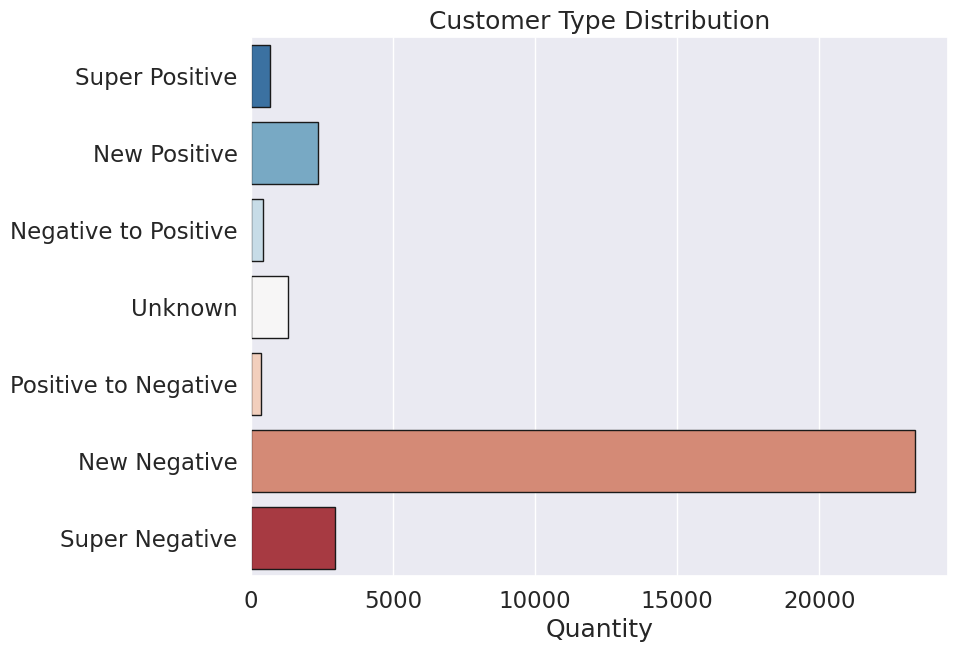

In [ ]:
# Comparison of the groups quantities
fig, ax = plt.subplots(figsize=(9,7))

order = ['Super Positive', 'New Positive', 'Negative to Positive', 'Unknown',
         'Positive to Negative', 'New Negative', 'Super Negative']

sns.set_context(rc = {'patch.linewidth': 0.1})
sns.countplot(y='group', data=Data, palette=sns.color_palette("RdBu_r", 7), order=order, linewidth=1, edgecolor='k')

plt.title('Customer Type Distribution')
plt.ylabel('')
plt.xlabel('Quantity')
plt.show()


Here, we can see the biggest category of the customers is the New Negative group followed by Super Negatives and New Positives.

Now we can explore other features whithin provided customer groups:

For example, let us see how the account balance varies within different groups:

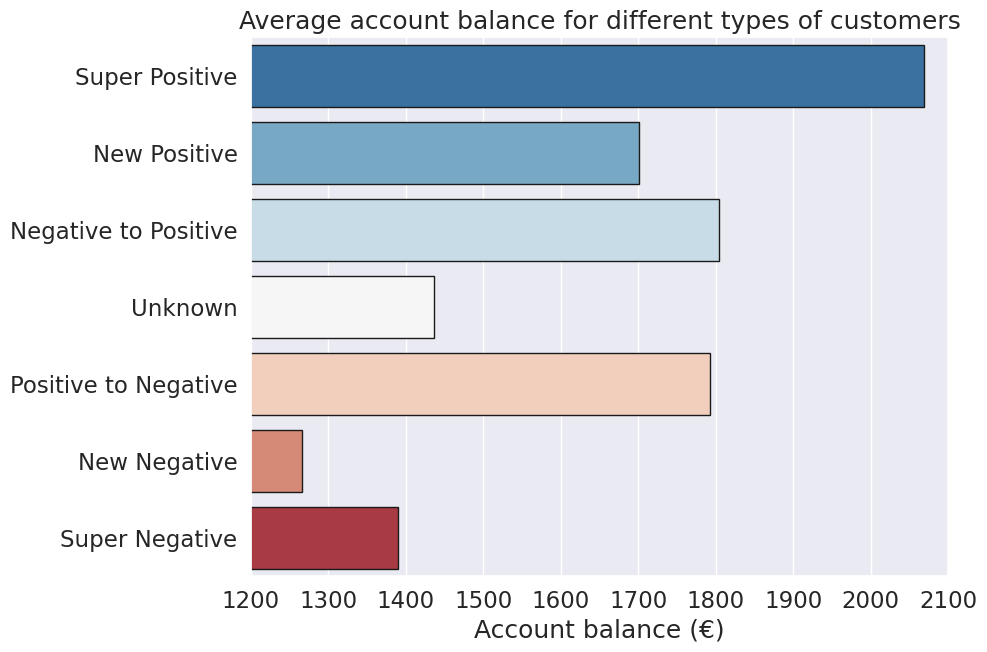

In [ ]:
# Variation of account balance in different groups
temp = Data.groupby('group', as_index=False)['accountBalance'].mean()
fig, ax = plt.subplots(figsize=(9,7))
sns.set_context(rc = {'patch.linewidth': 0.1})
sns.barplot(y='group', x='accountBalance', data=temp, palette=sns.color_palette("RdBu_r", 7), order=order, linewidth=1, edgecolor='k')

plt.title('Average account balance for different types of customers')
plt.ylabel('')
plt.xlabel('Account balance (€)')
plt.xlim(1200,2100)
plt.show()


From the data, it’s clear that positive customers tend to have a higher average account balance compared to negative customers, suggesting that financial status may be a factor in campaign success.

Next, let’s examine whether there is also a difference in age between these two groups. By comparing their age distributions, we can identify whether certain age brackets are more receptive to our campaign offers.


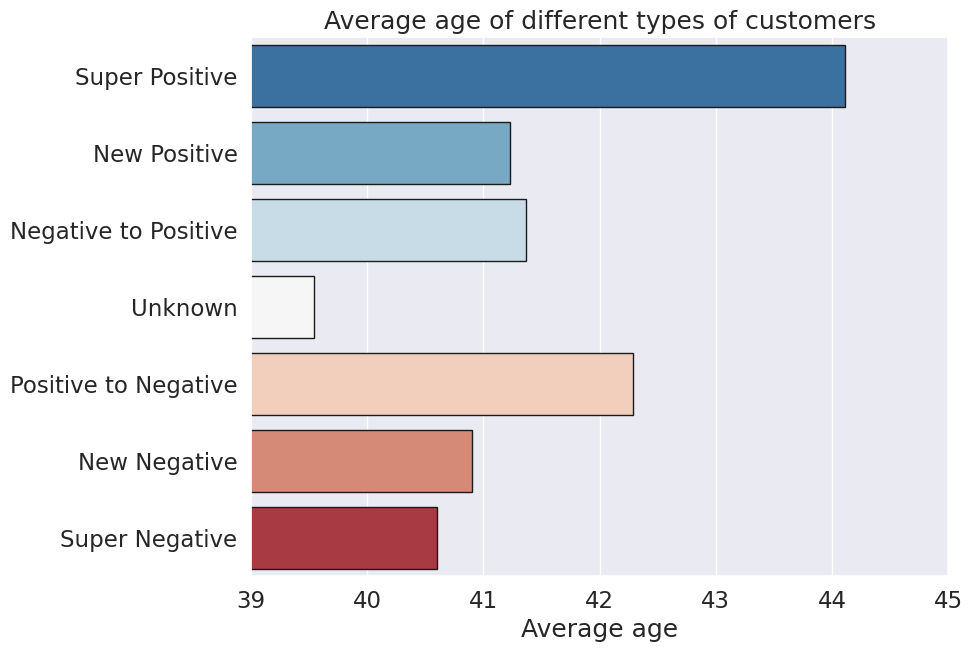

In [ ]:
# Age variation in different groups
temp = Data.groupby('group', as_index=False)['age'].mean()
fig, ax = plt.subplots(figsize=(9,7))
sns.set_context(rc = {'patch.linewidth': 0.1})
sns.barplot(y='group', x='age', data=temp, palette=sns.color_palette("RdBu_r", 7), order=order, linewidth=1, edgecolor='k')

plt.title('Average age of different types of customers')
plt.ylabel('')
plt.xlabel('Average age')
plt.xlim(39,45)
plt.show()

The diagram shows positive clients are in average older than the negative customers.

So, the combination of our insights from last two diagrams may lead to this conclusion that our best customers are not so young and their account status is better than the others.

Discovering who are these lovely super positive customers:
I this step, we can focus on Super Positive Customers to see what are their characteristics and if required make a comparion with the other groups w.r.t. that feature:

As an example, we can check job distribution in Super Positive Customers and compare it with Super Negative group:

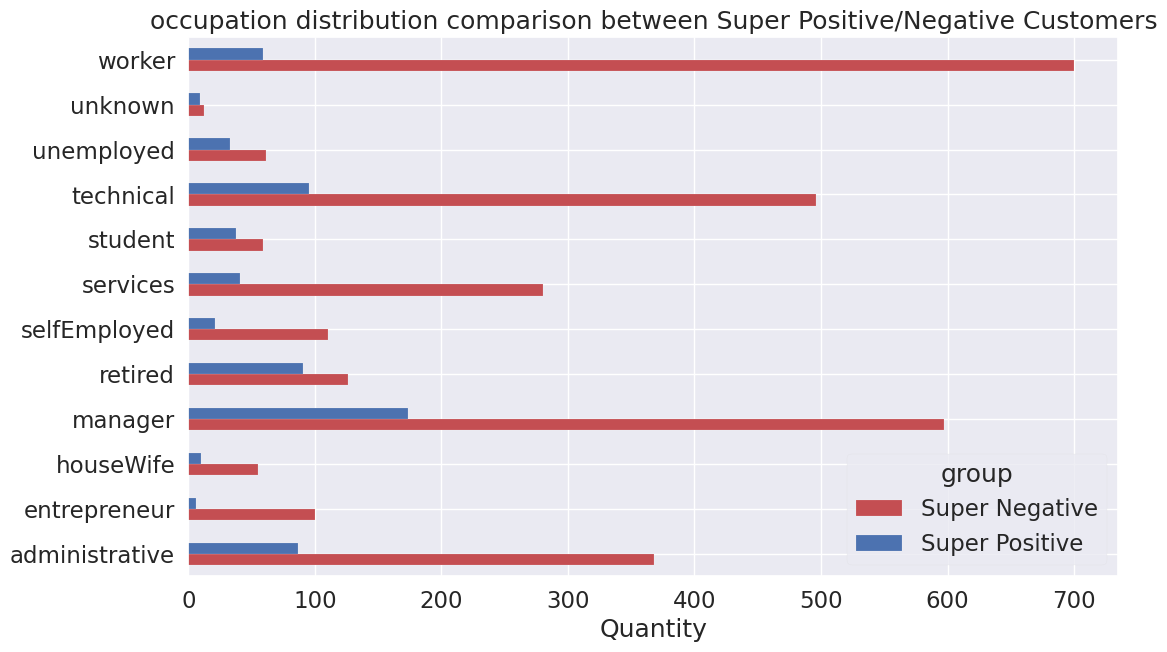

In [ ]:
# Comparion of two groups based on their job
temp = Data[(Data['group'] == 'Super Positive') | (Data['group'] == 'Super Negative')]
pd.crosstab(temp['job'],temp.group).plot(kind='barh', figsize=(12,7), color=['r', 'b'])
plt.title('occupation distribution comparison between Super Positive/Negative Customers')
plt.xlabel('Quantity')
plt.ylabel('');

Looking at the occupation breakdown, we notice a clear difference in the top roles: “Manager” is the most common occupation among Super Positive Customers, while “Worker” dominates among Super Negative Customers.

Shifting our focus to education levels, we can compare these two groups to see if higher education is linked to greater campaign receptiveness. This comparison may reveal whether professional background and education together contribute to a customer’s likelihood of responding positively

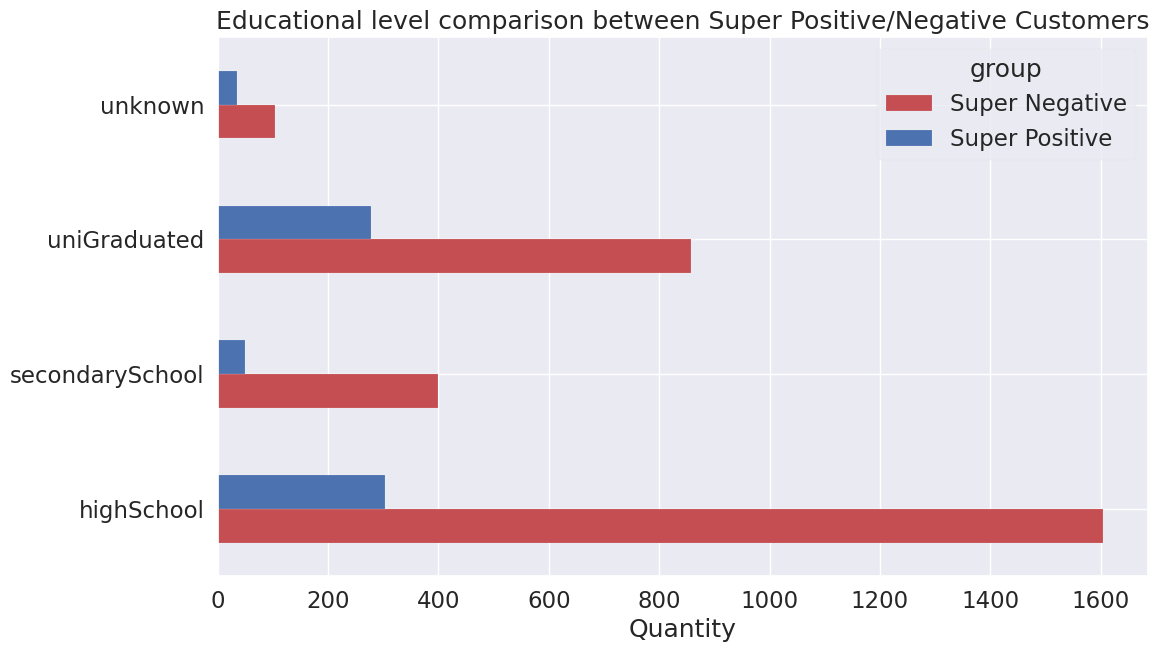

In [ ]:
# Comparion of two groups based on their educational level
# Comparion of two groups based on their job
temp = Data[(Data['group'] == 'Super Positive') | (Data['group'] == 'Super Negative')]
pd.crosstab(temp['education'],temp.group).plot(kind='barh', figsize=(12,7), color=['r', 'b'])
plt.title('Educational level comparison between Super Positive/Negative Customers')
plt.xlabel('Quantity')
plt.ylabel('');


In [ ]:
# Some textual information about educational levels in Super positive/negative customers
sumP = len(Data.loc[Data['group'] == 'Super Positive', :])
highSchoolP = len(Data.loc[(Data['group'] == 'Super Positive') & (Data['education'] == 'highSchool'), :])
sumN = len(Data.loc[Data['group'] == 'Super Negative', :])
highSchoolN = len(Data.loc[(Data['group'] == 'Super Negative') & (Data['education'] == 'highSchool'), :])

print('Percentage of Super positive customers with high school degree: {:.2f}%'.format(highSchoolP/(sumP)*100))
print('Percentage of Super Negative customers with high school degree: {:.2f}%\n'.format(highSchoolN/(sumN)*100))


uniP = len(Data.loc[(Data['group'] == 'Super Positive') & (Data['education'] == 'uniGraduated'), :])
uniN = len(Data.loc[(Data['group'] == 'Super Negative') & (Data['education'] == 'uniGraduated'), :])

print('Percentage of Super positive customers with a kind of university degree: {:.2f}%'.format(uniP/(sumP)*100))
print('Percentage of Super Negative customers with a kind of university degree: {:.2f}%'.format(uniN/(sumN)*100))

Percentage of Super positive customers with high school degree: 45.63%
Percentage of Super Negative customers with high school degree: 54.15%

Percentage of Super positive customers with a kind of university degree: 41.72%
Percentage of Super Negative customers with a kind of university degree: 28.91%


This comparison highlights a clear educational gap between the two groups. While more than half of Super Negative clients (54.15%) hold only a high school certificate, Super Positive Customers are more likely to possess an academic degree (41.72% vs. 28.91% for Super Negative clients).

This suggests that higher education levels may be positively correlated with campaign receptiveness, possibly due to differences in financial literacy, product understanding, or openness to marketing offers.

In [ ]:
# Dropping the columns that we add to the data for visualization purposes.
# The information provided in these columns are extracted from the original columns so dropping them is not harmful
Data.drop(['dayNum'], axis = 1, inplace = True)
Data.drop(['group'], axis = 1, inplace = True)

Data Preprocessing

One of the key goals of this project is to define, train, and evaluate predictive models on the campaign dataset. Most predictive algorithms require numerical input to process and learn patterns effectively. Therefore, categorical features with object data type must be converted into appropriate numerical representations.

1. Conversion of Target Feature to Binary Values

Our target variable, representing the campaign outcome, contains two possible string values: "yes" (customer accepted the offer) and "no" (customer refused the offer).
For modeling and plotting purposes, these labels are mapped to binary numeric values as follows:

Target (Original)

	Target (Numeric)
no	0

yes	1

This transformation allows us to plot relationships more easily and feed the target variable directly into machine learning algorithms.


In [ ]:
target_conversion = {"target": {"no": 0, "yes": 1}}
Data.replace(target_conversion, inplace=True)

one-hot-encoding of the field month:¶
A possible approach to convert the data type of the field month from categorial to numercal data type is to use naive variable encoding technique as follows:

month:

jan
⟹
 1

feb
⟹
 2

mar
⟹
 3

apr
⟹
 4

may
⟹
 5

jun
⟹
 6

jul
⟹
 7

aug
⟹
 8

sep
⟹
 9

oct
⟹
 10

nov
⟹
 11

dec
⟹
 12

Some categorical features—such as month—contain values like "jan", "feb", "mar", etc.
If we simply map them to integers (jan → 1, feb → 2, mar → 3, ...), most machine learning models will incorrectly assume there is a numeric ordering and that "apr" is greater than "jan", which is not meaningful in this context.

To avoid such a misinterpretation, we apply One-Hot Encoding (OHE).
This transformation creates binary columns—one for each category—where the value is 1 if the record belongs to that category, otherwise 0.


In [ ]:
### month one-hot Encoding ###

# Get one hot encoding of columns 'month'
month_one_hot = pd.get_dummies(Data.month)
# Drop column 'month' as it is now encoded
Data.drop('month',axis = 1, inplace=True)
# Join the encoded month fields
Data = Data.join(month_one_hot)

In [ ]:
###  one-hot encoding of the fields:
### 'job', 'maritalStatus', 'education', 'contactType' & 'lastCampaignResult'

# make a difference between 'job_unknown', 'education_unknown' and 'contactType_unknown'
Data.loc[Data['job'] == 'unknown', 'job'] = 'job_unknown'
Data.loc[Data['education'] == 'unknown', 'education'] = 'education_unknown'
Data.loc[Data['contactType'] == 'unknown', 'contactType'] = 'contactType_unknown'

# for more clarification of values in 'lastCampaignResult' field we change them as follows
Data.loc[Data['lastCampaignResult'] == 'unknown', 'lastCampaignResult'] = 'lastCampaignResult_unknown'
Data.loc[Data['lastCampaignResult'] == 'failure', 'lastCampaignResult'] = 'lastCampaignResult_failure'
Data.loc[Data['lastCampaignResult'] == 'other'  , 'lastCampaignResult'] = 'lastCampaignResult_other'
Data.loc[Data['lastCampaignResult'] == 'success', 'lastCampaignResult'] = 'lastCampaignResult_success'


columns = ['job', 'maritalStatus', 'education', 'contactType', 'lastCampaignResult']

for col in columns:
    # Get one hot encoding of the column
    col_one_hot = pd.get_dummies(Data[col])
    # Drop column as it is now encoded
    Data.drop(col,axis = 1, inplace=True)
    # Join the encoded Monat fields
    Data = Data.join(col_one_hot)


In [ ]:
# Variable Encoding of the fields 'gender', 'creditFailure', 'credit', 'house' as we did for 'target' before

Geschlecht_conversion = {"gender": {"female": 0, "male": 1}}
Data.replace(Geschlecht_conversion, inplace=True)

columns = ['creditFailure', 'credit', 'house']

for col in columns:
    conversion = {col: {"no": 0, "yes": 1}}
    Data.replace(conversion, inplace=True)

Feature Selection and Feature Engineering

Feature selection and engineering are often the most impactful steps in a machine learning workflow—sometimes more important than the choice of algorithm or tuning hyperparameters.

If the model is not given the right features, it will be set up to fail, no matter how sophisticated the model itself is.

Feature Selection

Feature selection is the process of identifying and keeping only the most relevant features for predicting the target.

Why? Irrelevant or noisy features can mislead the model, reduce accuracy, and make the model harder to interpret.

How? Relevance can be determined using:

Statistical measures (e.g., correlation with the target)

Variance thresholds (features with almost no variation are uninformative)

Model-based importance scores

In practice, feature selection is about subtracting less important features.

Example from our dataset:
The columns id and contactId contain unique or near-unique values for each record. Because these identifiers have very high variance but carry no meaningful relationship to the target, they do not help the model learn patterns.
➡ Action: Remove id and contactId from the training dataset.

Feature Engineering

Feature engineering involves creating new features from existing raw data to help the model capture patterns better.

This can involve:

Mathematical transformations (log-scaling, polynomial terms)

Aggregations (averages, counts)

Encoding categorical variables (e.g., one-hot encoding for months)

Combining existing features to form new meaningful ones

Think of feature engineering as adding useful features to the dataset, while feature selection is removing unhelpful ones.

In [ ]:
Data.drop(['id'], axis = 1, inplace = True)
Data.drop(['contactId'], axis = 1, inplace = True)

# ***Removing Multicollinearities***

Multicollinearity occurs when two or more features in a dataset are highly correlated with each other.
This can cause problems because the model may receive redundant information, making it harder to correctly interpret relationships between features and the target.

# *Why Multicollinearity Matters*

For Linear Models (e.g., Linear Regression, Logistic Regression)

It can cause unstable coefficients, meaning small changes in data can lead to large swings in model parameters.

This instability can make the model unreliable and difficult to interpret.

For Tree-Based Models (e.g., Random Forest, Gradient Boosting)

While these models are less sensitive to multicollinearity, highly correlated features can still mask important feature interactions.

For All Models ***bold text***

Extra features that don’t add new information make the model unnecessarily complex.

Simpler models are generally preferable for better interpretability and generalization.

# How to Detect Multicollinearity

A common method is to look at the correlation matrix of the features:

Compute the Pearson correlation between all pairs of numerical features.

Identify pairs with correlation coefficients close to +1 or -1 (e.g., above 0.85 or below -0.85).






# ***Collinearity Elimination***

While small correlations between variables are common and often harmless, highly collinear features can be redundant. In such cases, keeping both variables doesn’t provide new information to the model.

*Why Remove Collinear Features?*

Reduce Model Complexity – Fewer features mean simpler models that train faster and are easier to maintain.

Improve Generalization – Removing redundant information helps the model focus on meaningful signals, reducing overfitting.

Better Interpretability – With fewer features, understanding model decisions becomes easier.

# *Our Approach*

There are several ways to detect and remove collinearity:

Variance Inflation Factor (VIF) – Statistical measure of feature redundancy.

Correlation Thresholding – Remove one feature from pairs with a correlation above a certain threshold.

Here, we will use correlation thresholding:

Compute correlations between all pairs of features.

Remove one of the features if the absolute correlation coefficient exceeds 0.5.

Important: This is done based on correlation between features — not correlation with the target — because we actually want features strongly correlated with the target.

In [ ]:
def show_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        threshold: any features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Dont want to remove correlations that are realted to the target variable
    x = x.drop(columns = ['target'])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    return 0

In [ ]:
show_collinear_features(Data, 0.5);

uniGraduated | manager | 0.59
uniGraduated | highSchool | 0.66
lastCampaignResult_failure | daySinceLastCampaign | 0.7
lastCampaignResult_unknown | daySinceLastCampaign | 0.87
lastCampaignResult_unknown | numberOfContactsLastCampaign | 0.5
lastCampaignResult_unknown | lastCampaignResult_failure | 0.74


# ***Collinearity Decisions***

From the correlation analysis:

uniGraduated shows strong correlations with both:

manager (positive correlation) → likely because managers tend to be highly educated.

highSchool (negative correlation) → higher education generally excludes only having a high school certificate.
This suggests that uniGraduated largely duplicates information already contained in other features.
Decision: Remove uniGraduated.

lastCampaignResult_unknown is highly correlated with three other features, meaning it overlaps significantly with existing information in the dataset.
Decision: Remove lastCampaignResult_unknown.

Removing these features should:

Reduce redundancy in the dataset.

Improve model interpretability.

Potentially help generalization by avoiding overfitting to duplicate signals.

In [ ]:
Data.drop(['uniGraduated'], axis = 1, inplace = True)
Data.drop(['lastCampaignResult_unknown'], axis = 1, inplace = True)

# *Correlation Discovery:¶*
Now that our training data is ready for more numerical analysis, we can take a look at the corrlation strength between all the features and the target value:

In [ ]:
Data.corr()['target'][1:].sort_values(ascending=False)

,target
duration,0.39
lastCampaignResult_success,0.30
cellPhone,0.14
mar,0.13
oct,0.13
sep,0.12
daySinceLastCampaign,0.10
numberOfContactsLastCampaign,0.08
retired,0.08
student,0.07


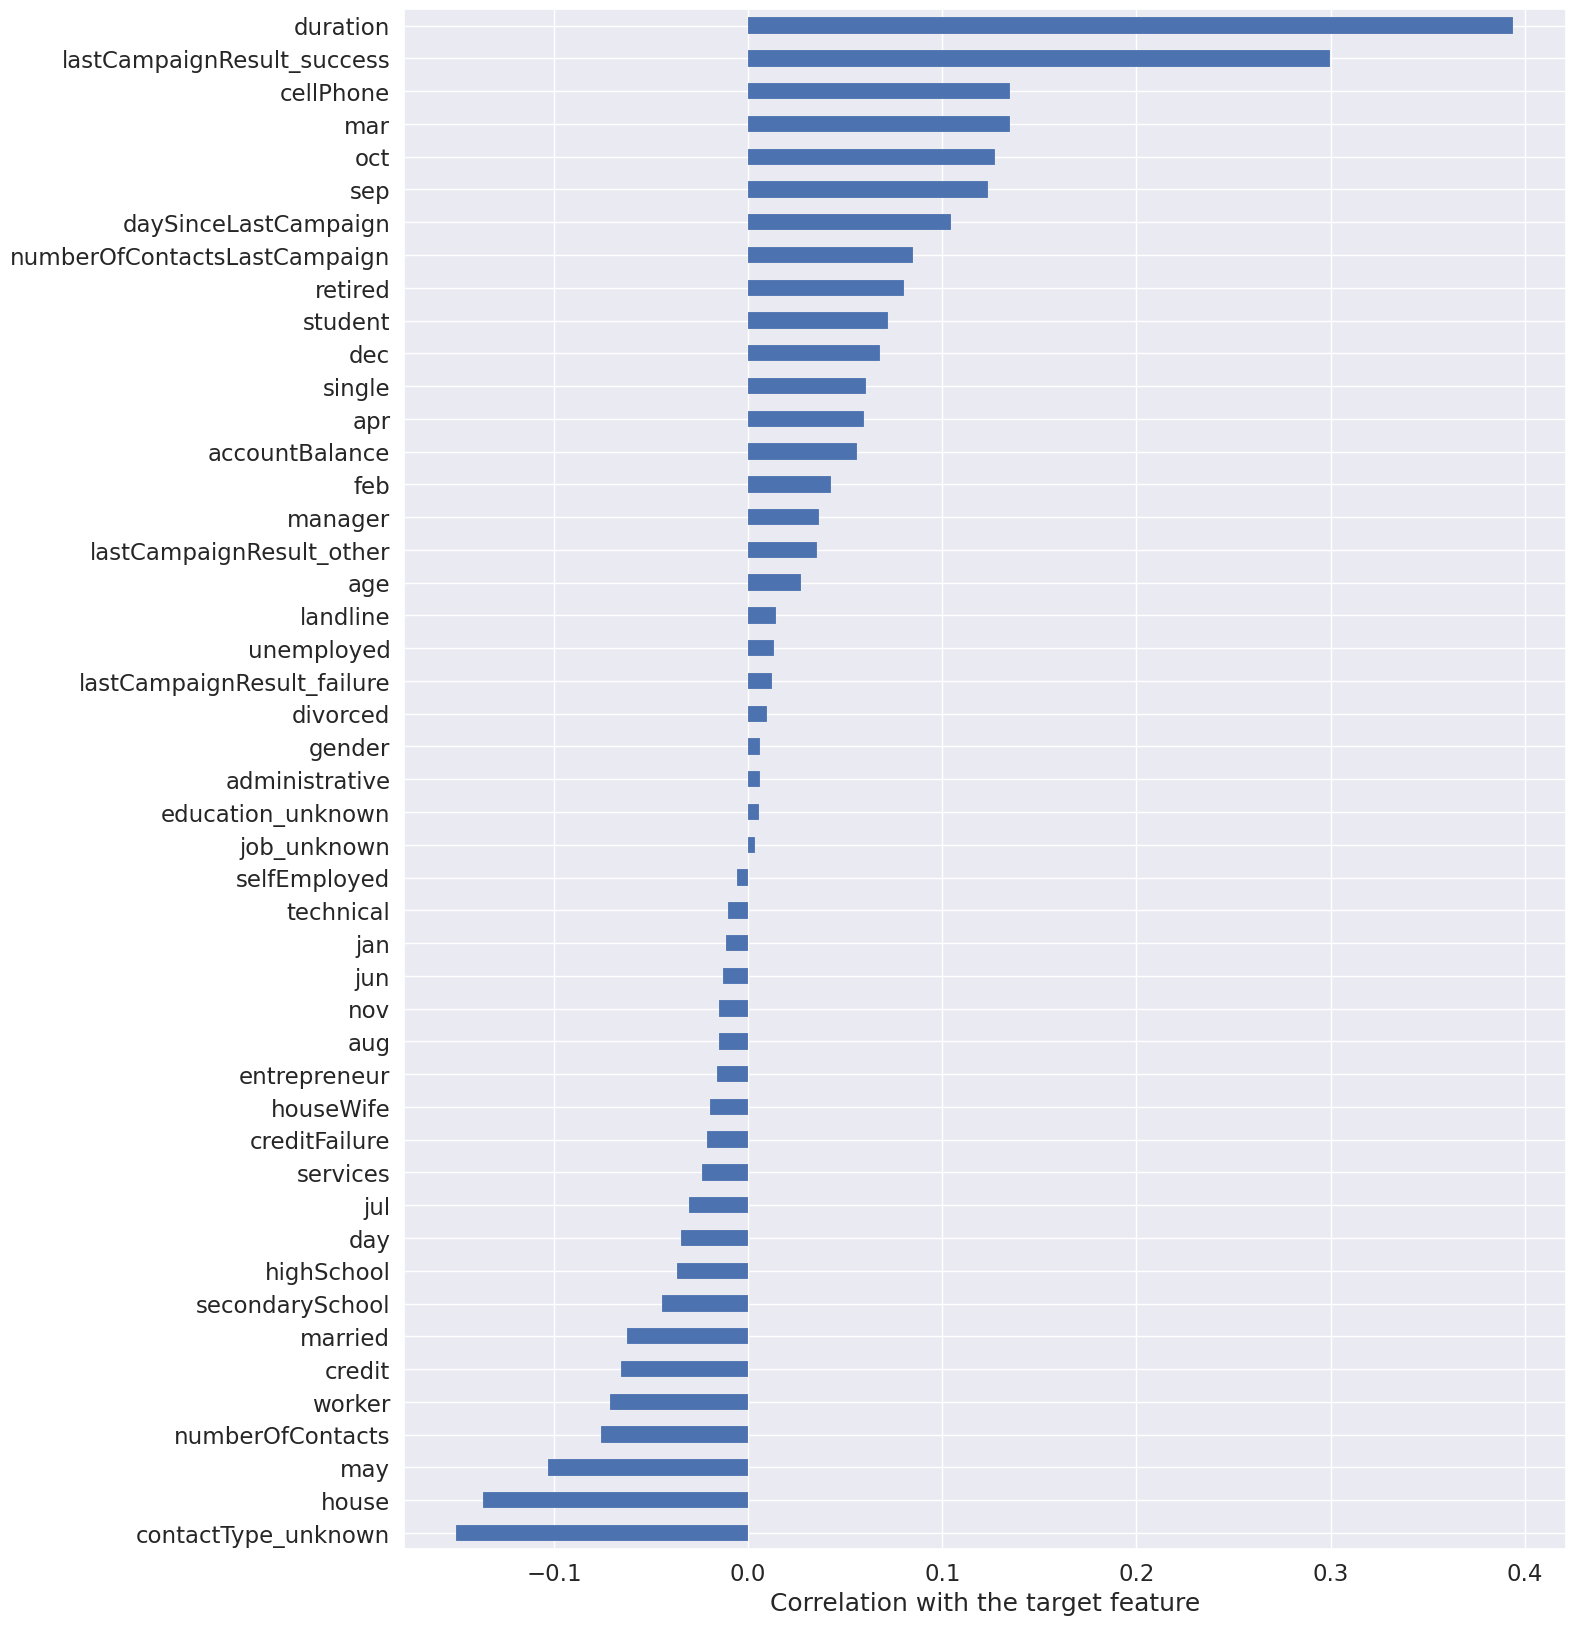

In [ ]:
fig = Data.corr()['target'][1:].sort_values(ascending=True).plot(kind='barh', figsize = (15,20))
fig.set(xlabel='Correlation with the target feature', ylabel='');

# *Correlation Insights & Recommendations*

# *Call Duration Matters*

Finding: Longer call durations are strongly linked to a higher chance of campaign acceptance.

Action: Train agents to engage customers in longer, meaningful conversations.

Previous Campaign Success is a Strong Predictor

Finding: Customers who accepted the previous campaign (our "Super Positive" group) are far more likely to accept the current one.

Action: Prioritize outreach to customers with past positive responses.

Contact Type Impact (Cell > Landline > Unknown)

Finding: Calling cell phones yields better results than landlines.

Caution: Most customers were contacted by cell phone, so this effect may be biased.

Best Months to Call (March, October, September)

Finding: Higher success rates in these months.

Caution: Possibly influenced by lower contact volumes and loyal customer targeting.

Action: Encourage increased outreach in these months, but verify with controlled tests.

Recency & Intensity of Previous Campaign Contacts

Finding: Customers not contacted for a while, but highly involved in the last campaign, respond better.

Action: Use a "cooling-off period" before re-engaging high-value customers.

Demographic Preferences

Positive Response Groups:

Retired customers

Students

Single customers (vs. married customers)

Customers with higher account balances

Older customers

Neutral Factor: Gender — no significant impact. Consider removing from the model.

Timing Within the Month

Finding: Calls at the start of the month have higher success rates, possibly due to higher disposable income.

Action: Schedule key campaigns early in the month.

Financial History Impact

Finding: Negative credit history correlates with lower acceptance rates.

Action: Target customers with better financial standing for premium offers.

Contact Frequency

Finding: Excessive calling reduces campaign success.

Action: Limit the number of follow-up calls to avoid customer fatigue.

Home Ownership

Finding: Customers without a house are more likely to accept the campaign.

Action: Tailor offers differently for homeowners vs. renters.

Occupation Effect

Finding: Managers are more likely to accept than employees.

Action: When possible, target decision-makers directly.




When we check how strongly each feature is related to the target, we shouldn’t just look at whether the correlation is positive or negative.

A positive correlation means the feature goes up when the target goes up.
A negative correlation means the feature goes down when the target goes up.

But in both cases, the feature still has an important connection to the target — just in opposite directions.

So, instead of looking at the correlation numbers as they are, we take their absolute value (remove the “+” or “–” sign). This way, a correlation of +0.75 and a correlation of -0.75 are both treated as equally strong (0.75).

That helps us focus on how strong the relationship is, not whether it’s going up or down.



In [ ]:
Data.corr()['target'][1:].abs().sort_values(ascending=False)

,target
duration,0.39
lastCampaignResult_success,0.30
contactType_unknown,0.15
house,0.14
cellPhone,0.14
mar,0.13
oct,0.13
sep,0.12
daySinceLastCampaign,0.10
may,0.10


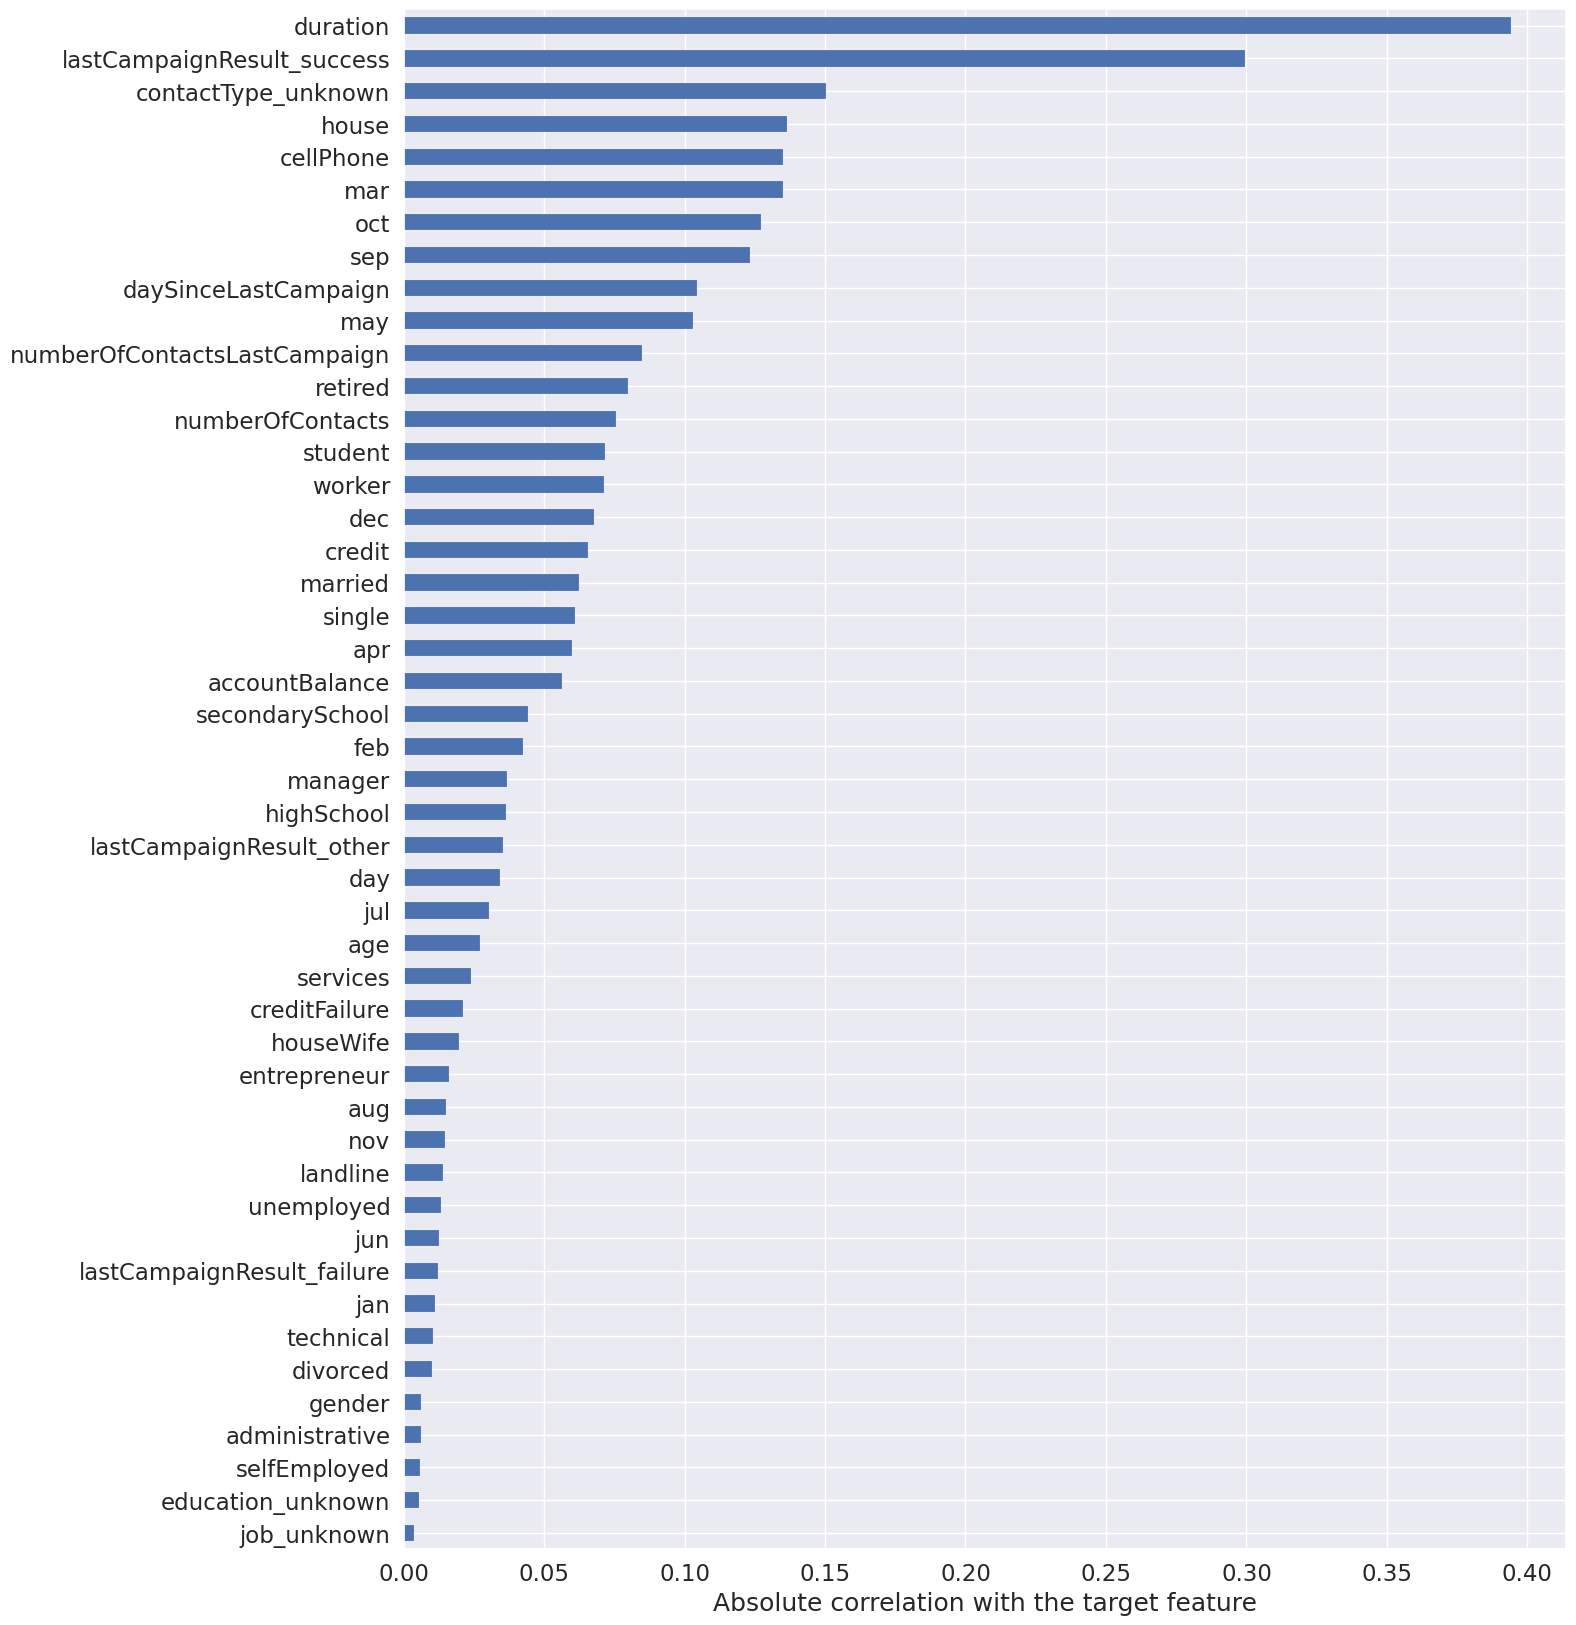

In [ ]:
fig = Data.corr()['target'][1:].abs().sort_values(ascending=True).plot(kind='barh', figsize = (15,20))
fig.set(xlabel='Absolute correlation with the target feature', ylabel='');


We have a list of features, each with an importance score (how much it helps the model make correct predictions).

We set a cut-off point — here it’s 0.05.

Then we keep only the features whose importance score is more than 0.05 and drop the rest, because those low-score features don’t really help the model.

In [ ]:
def high_features(data, threshold):
    names = []
    for idx , val in ranking.iteritems():
        if val >= threshold:
            names.append(idx)
    return names

In [ ]:
def high_features(ranking, threshold):
    return ranking[ranking > threshold].index.tolist()

ranking = Data.corr()['target'][1:].abs().sort_values(ascending=False)
myCols = high_features(ranking, 0.05)
print(myCols)


['duration', 'lastCampaignResult_success', 'contactType_unknown', 'house', 'cellPhone', 'mar', 'oct', 'sep', 'daySinceLastCampaign', 'may', 'numberOfContactsLastCampaign', 'retired', 'numberOfContacts', 'student', 'worker', 'dec', 'credit', 'married', 'single', 'apr', 'accountBalance']


The above selection of the features is our selection based on correlation coefficients of the features with the target. We will refer to this set of features as **myCols** in the following sections.

# *Normalization*
It is important to normalize our features so that they can have approximately same scale and be comparable. This also prevents high values dominate the low values so, the model can learn from all the features. Normalization specially helps the convergence of the optimization process within the models. This is also more important for some model such as SVM, neural network and KNN.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

X = Data.drop(columns='target')
y = pd.DataFrame(Data['target'])
dataCols = X.columns

scaler.fit(X)
X = scaler.transform(X)

Data = pd.DataFrame(X, columns=dataCols)
Data['target'] = y

In [ ]:
# decreasing binary features type accuracy for a more efficient memory usage
for col in Data.columns:
    if len(Data[col].unique()) == 2:
        Data[col]= Data[col].astype('uint8')

Splitting the data Into Training and Test Sets¶
In machine learning, we always need to separate our features into two sets:



Training set which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.
Test (validation) set which we use to evaluate the mapping learned by the model. The model has never seen the answers on the test set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world.

In [ ]:
# Separate out the features and targets
# on the original data
def orgData(Data):
    X = Data.drop(columns='target')
    y = pd.DataFrame(Data['target'])
    dataCols = X.columns

    X_values = X.values
    y_values = np.array(y).reshape((-1,))

    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size = 0.2, random_state = 0)
    return [dataCols, X_train, X_test, y_train, y_test]

In [ ]:
# Separate out the features and targets
# on the data that includes only 'myCols' features
def myData(Data):
    X = pd.DataFrame(Data[myCols])
    y = pd.DataFrame(Data['target'])
    dataCols = X.columns

    X_values = X.values
    y_values = np.array(y).reshape((-1,))

    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size = 0.2, random_state = 0)
    return [X_train, X_test, y_train, y_test]

Using Synthetic Minority Over-sampling Technique (SMOTE) to overcome the imbalanced label problem¶
To overcome the previously discovered label imbalance problem in the training data, we can use the Synthetic Minority Over-sampling Technique (SMOTE) algorithm to create synthetic samples from the minor class.

In [ ]:
from imblearn.over_sampling import SMOTE

def smoteData(Data):
    [dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

    smote = SMOTE(random_state=0)

    smote_data_X,smote_data_y = smote.fit_resample(X_train, y_train)

    smote_data_X = pd.DataFrame(data=smote_data_X,columns=dataCols)
    smote_data_y = pd.DataFrame(data=smote_data_y,columns=['target'])

    X_train_smote = smote_data_X.values
    y_train_smote = smote_data_y.values
    y_train_smote = y_train_smote.reshape((-1,))

    return [X_train_smote, X_test, y_train_smote, y_test]

# ***Note: In this function, oversampling is performed while the test data is excluded, So, no test data information is exploited for model training.***

So we have three functions that can be used to split different kinds of the data into training and test sets:

orgData that splits the original version of the data into training and test samples.

myData that splits a version of the data into training and test samples that includes only myCols features (features that are chosen based oh their correlations with the target).

smoteData that splits a version of the data into training and test samples that includes over-sampled minority class and is balanced w.r.t. our binary labels.

At the beginning of each training process, one of these functions will be used to prepare the data.

# ***Training some models (binary classifiers) on the data:***

In this part, we train some models such as logistic regression and Random Forest to see how much better do they perform than our baseline random guess:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

Baseline establishment:¶
It's important to establish a naive baseline before we training machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. Possible reasons for such a situation would be not using the right models, need for more data, existence of a simpler solution that does not require machine learning.

For a binary classification task, a good naive baseline is to select one of two possible labels with the probability of 50%. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach.










To be sure that our data is splitted correctly, we may check if two sets of training and test data have an equal proportion of positive samples:



In [ ]:
[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

print('percentage of positive labels in training data: {:.2f}%' . format(sum(y_train)/len(y_train)*100))
print('percentage of positive labels in test data: {:.2f}%' . format(sum(y_test)/len(y_test)*100))


percentage of positive labels in training data: 0.58%
percentage of positive labels in test data: 3.59%


In [ ]:
y_baseline = np.random.randint(2, size=len(y_test))

Before going further we have to think about the meaning and the importance of two concepts in our problem:
# New Section
# False Positive predictions (Type I error): means we wrongly classified negative customers (who will reject the campaign) as positive customers (who will accept the campaign). The consequence of such a wrong prediction, is to waste our time to contact those customers and get a rejection. Not so bad.


False Negative predictions (Type II error): means we wrongly classified positive customers (who will accept the campaign) as negative customers (who will reject the campaign). The consequence of such a wrong prediction, is to not contact good customers and lose an excellent sale opportunity. That is not the situation that your manager wants to deal with. Too dangerous!


So, we should take a measure that is cautious about the False Negative rate which is recall.

Now, we can evaluate the baseline guess recall score on the test set

In [ ]:
recall = recall_score(y_test, y_baseline)
print("Baseline Performance on the test set: %.2f%%" % (recall * 100.0))

Baseline Performance on the test set: 53.79%


Here we introduce some extra fuctions that are reponsible for the rest of the process:

In [ ]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm[[0, 1]] = cm[[1, 0]] # swapping rows
    cm[:,[1,0]] = cm[:,[0,1]] # swapping cols
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """
    This function trains the input model on the data, evaluates the model performance on the test set,
    plots the confusion matrix of the model and finally reports the model recall score on the test data
    """
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, classes=np.array(['yes', 'no']), normalize=True)
    plt.grid(None)
    print('\n', classification_report(y_test, y_pred, target_names=np.array(['yes', 'no']), labels = [1, 0]))

    print("Dimensions of training data: {}" .format(X_train.shape))

    recall = recall_score(y_test, y_pred)
    print("Recall: %.2f%%" % (recall * 100.0))

    return model, (recall * 100.0)

In [ ]:
def grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, refit_score):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)


    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    return grid_search

In [ ]:
def plotROC(model, X_train, y_Train, X_test, y_Test, typ=1):
    """
    this function plots the ROC curve of a trained model on the test data
    and reports the Area Under Curve (AUC) for it.
    """
    if typ == 1:
        y_pred = model.predict_proba(X_test)
        # keep probabilities for the positive outcome only
        y_pred = y_pred[:, 1]
    else:
        y_pred = model.decision_function(X_test)



    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots(figsize=(9,6))
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.plot([0, 0], [0, 1], 'k-') # right
    ax.plot([1, 0], [0, 0], 'k-') # down
    ax.plot([1, 1], [0, 1], 'k-') # left
    ax.plot([1, 0], [1, 1], 'k-') # up
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve of the current classifier')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

def checkThresh(clf, X_test, y_test, typ = 1, prt=0):

    """
    this function plots the ROC curve of a trained model on the test data
    against nine different thresholds {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9} for classification probability thresholding
    """

    TSs = []
    TPs = []
    FPs = []
    for threshold in np.arange(0.1, 1, 0.1):
        TSs.append(round(threshold,2))

        if typ == 1:
            predicted_proba = clf.predict_proba(X_test)
            y_pred = (predicted_proba [:,1] >= threshold).astype('int')
        else:
            predicted_proba = clf.decision_function(X_test)
            y_pred = (predicted_proba >= threshold).astype('int')


        cm = confusion_matrix(y_test, y_pred)

        FN = cm[0][0] / (cm[0][0] + cm[0][1])
        FP = cm[0][1] / (cm[0][0] + cm[0][1])
        FPs.append(FP)
        TN = cm[1][0] / (cm[1][0] + cm[1][1])
        TP = cm[1][1] / (cm[1][0] + cm[1][1])
        TPs.append(TP)

        if prt:
            print('Threshold: {:.1f}, TP: {:.2f}, TN: {:.2f} , FP: {:.2f}, FN: {:.2f} %'
              .format(threshold, TP, FN, FP, TN))

    fig, ax = plt.subplots(figsize=(9,6))
    ax.scatter( x=FPs, y=TPs , label='ROC Convex Hall')
    ax.plot([0, 1], [0, 1], 'k--') # diag
    ax.plot([0, 0], [0, 1], 'k-') # right
    ax.plot([1, 0], [0, 0], 'k-') # down
    ax.plot([1, 1], [0, 1], 'k-') # left
    ax.plot([1, 0], [1, 1], 'k-') # up
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC convex hull for different thresholds on the current classifier')

    for i, label in enumerate(TSs):
        ax.annotate(label, (FPs[i]+0.01, TPs[i]+ 0.005), fontsize=14)

    plt.show()

In [ ]:
# A Dataframe to hold the results
results = pd.DataFrame({'model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Extra Trees',
                                           'Gradient Boosting', 'Xgboost'] })
results['orgDataDefault'] = ''
results['myColsDefault'] = ''
results['orgDataOptimal'] = ''
results['myColsOptimal'] = ''
results['orgDataOptimalRFE'] = ''
results['smoteDataDefault'] = ''
results['smoteDataOptimal'] = ''
results['smoteDataOptimalRFE'] = ''

# *Training steps for each model:¶*
In the following section, I train several machine learning models including:

Logistic Regression (LR) *
Random Forest Classifier (RFC) *
Support Vector Classifier (SVC) *
Extra Trees Classifier (ETC) *
Gradient Boosting Classifier (GBC) +
eXtreme Gradient Boosting (XGBoost) +
(*): models that have an explicit parameter to handle imbalanced label problem (class_weight='balanced')

(+): models that don't have an explicit parameter to handle imbalanced label problem

# Processing steps on (*) models:

Training the model with the default hyper parameters on the original Data (orgData) and plotting the results.
Training the model with the default hyper parameters on previously selected features (myData) and plotting the results.
Execution of the Grid Search Cross Validation technique for tuning model hyper parameters (finding optimal hyper parameters).
Training the model with the optimal hyper parameters on the original Data (orgData) and plotting the results.
Training the model with the optimal hyper parameters on previously selected features (myData) and plotting the results.
Runnig the Recursive Feature Elimination (RFE) method with cross-validation as the second feature selection approach.
Training the model with the optimal hyper parameters on the resulting features of the RFE process on orgData and plotting the results.
Processing steps on (+) models:

Training the model with the default hyper parameters on the balanced Data (smoteData) and plotting the results.
Execution of the Grid Search Cross Validation technique for tuning model hyper parameters (finding optimal hyper parameters).
Training the model with the optimal hyper parameters on the balanced Data (smoteData) and plotting the results.
Running the Recursive Feature Elimination (RFE) method with cross-validation as the second feature selection approach.
Training the model with the optimal hyper parameters on the resulting features of the RFE process on the balanced Data (smoteData) and plotting the results.

***Model # 1: Logistic Regression***


               precision    recall  f1-score   support

         yes       0.42      0.81      0.56       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.85      6296
   macro avg       0.70      0.83      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (25184, 47)
Recall: 81.30%


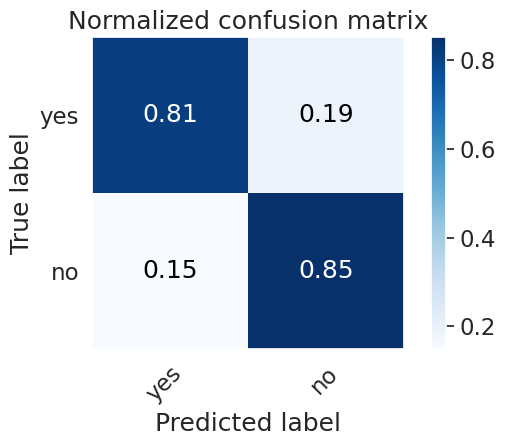

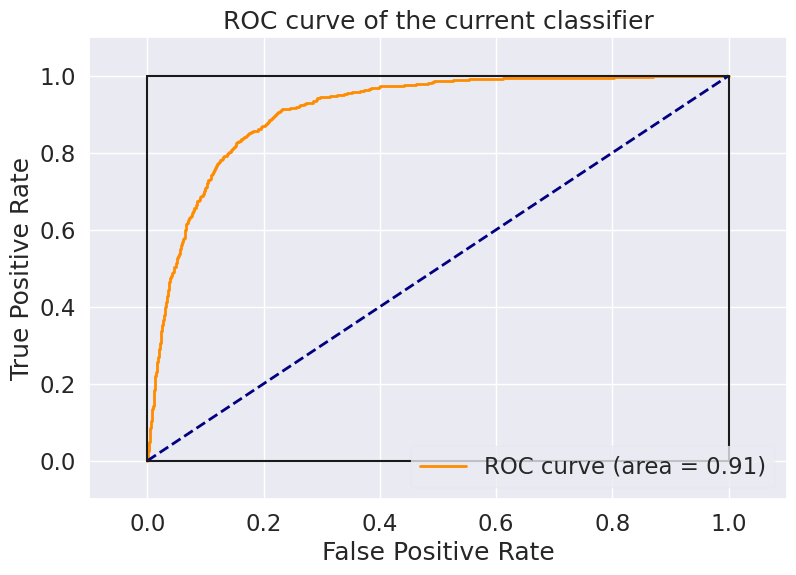

In [ ]:
# First model (Logistic Regression) definition, training and evaluation
# on the original data (orgData)
# with default hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced')

logreg, results.at[0, 'orgDataDefault']  = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.42      0.81      0.56       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.85      6296
   macro avg       0.70      0.83      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (25184, 21)
Recall: 80.89%


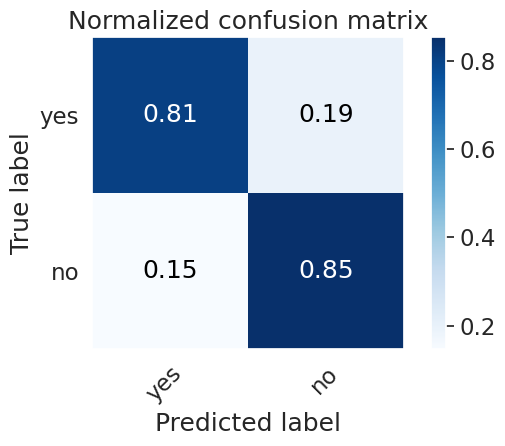

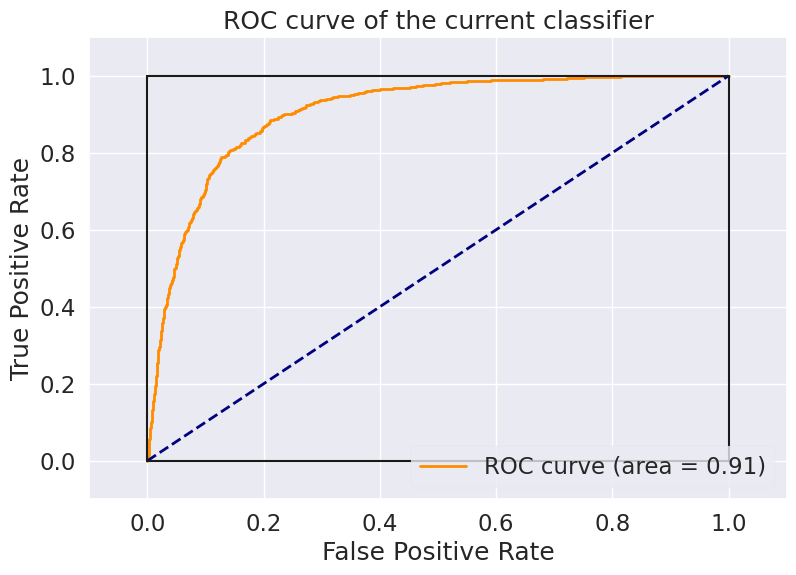

In [ ]:
# First model (Logistic Regression) definition, training and evaluation
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced')

logreg, results.at[0, 'myColsDefault'] = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)

In [ ]:
# GridSearchCV for tuning hyper parameters of the first model (Logistic Regression)

[X_train, X_test, y_train, y_test] = myData(Data)

clf = LogisticRegression(class_weight= 'balanced', verbose=0, max_iter=1000)

param_grid = {
    'solver': ['lbfgs', 'newton-cg'],
    'C' : [0.5, 1, 2, 10, 100, 1000, 10000],
    'tol' : [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

Best params for recall_score
{'C': 100, 'solver': 'lbfgs', 'tol': 1e-06}


In [ ]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_C',
         'param_tol', 'param_solver']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_C,param_tol,param_solver
45,0.41,0.80,0.84,100.00,0.00,newton-cg
46,0.41,0.80,0.84,100.00,0.00,newton-cg
41,0.41,0.80,0.84,100.00,0.00,lbfgs
40,0.41,0.80,0.84,100.00,0.00,lbfgs
47,0.41,0.80,0.84,100.00,0.00,newton-cg



               precision    recall  f1-score   support

         yes       0.42      0.82      0.56       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.85      6296
   macro avg       0.70      0.84      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (25184, 47)
Recall: 82.38%


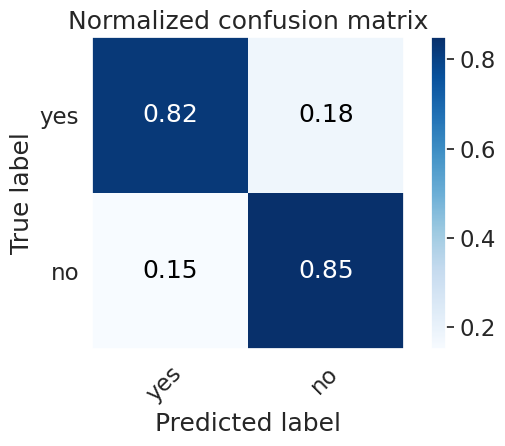

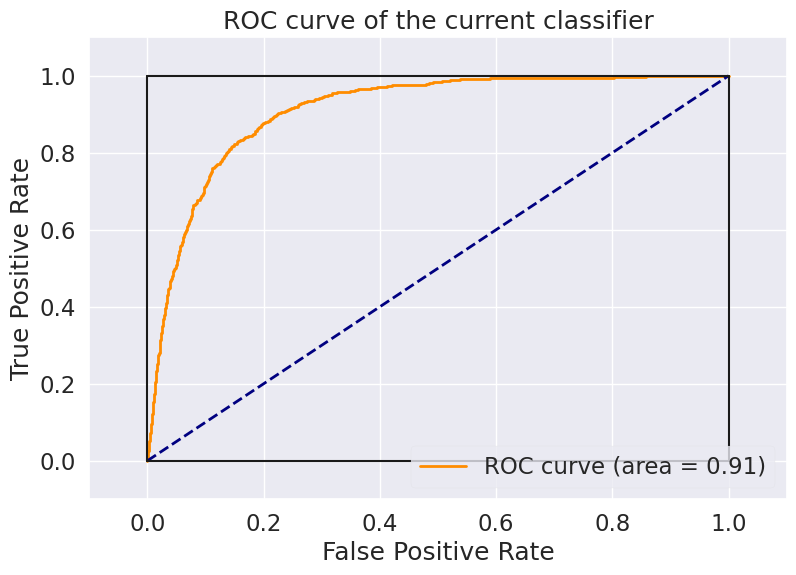


               precision    recall  f1-score   support

         yes       0.42      0.81      0.55       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.84      6296
   macro avg       0.69      0.83      0.73      6296
weighted avg       0.91      0.84      0.86      6296

Dimensions of training data: (25184, 21)
Recall: 81.44%


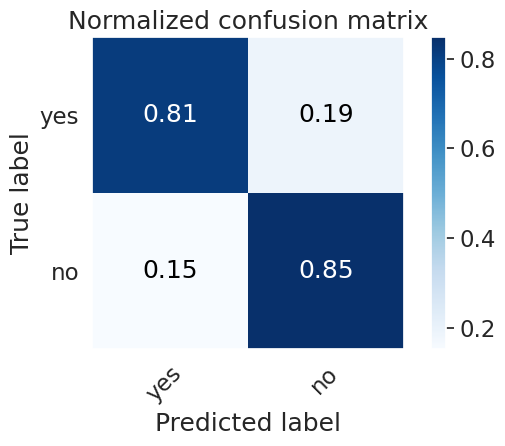

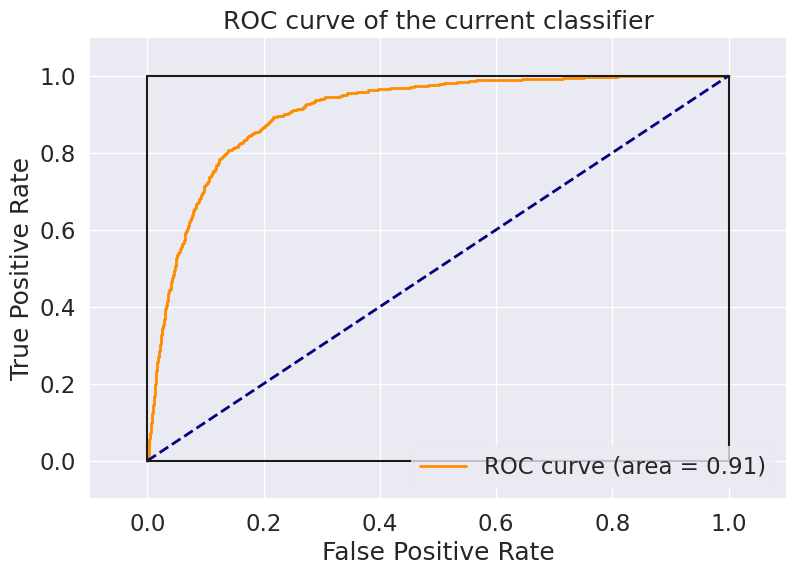

In [ ]:
# First model (Logistic Regression) definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, solver='lbfgs', tol=1e-06, max_iter=1000)

logreg, results.at[0, 'orgDataOptimal']  = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)
# First model (Logistic Regression) definition, training and evaluation
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, solver='lbfgs', tol=1e-06, max_iter=1000)

logreg, results.at[0, 'myColsOptimal'] = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)



               precision    recall  f1-score   support

         yes       0.42      0.81      0.55       738
          no       0.97      0.85      0.91      5558

    accuracy                           0.84      6296
   macro avg       0.69      0.83      0.73      6296
weighted avg       0.91      0.84      0.86      6296

Dimensions of training data: (25184, 21)
Recall: 81.44%


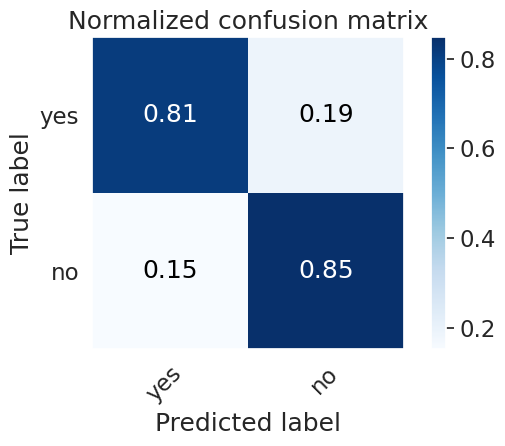

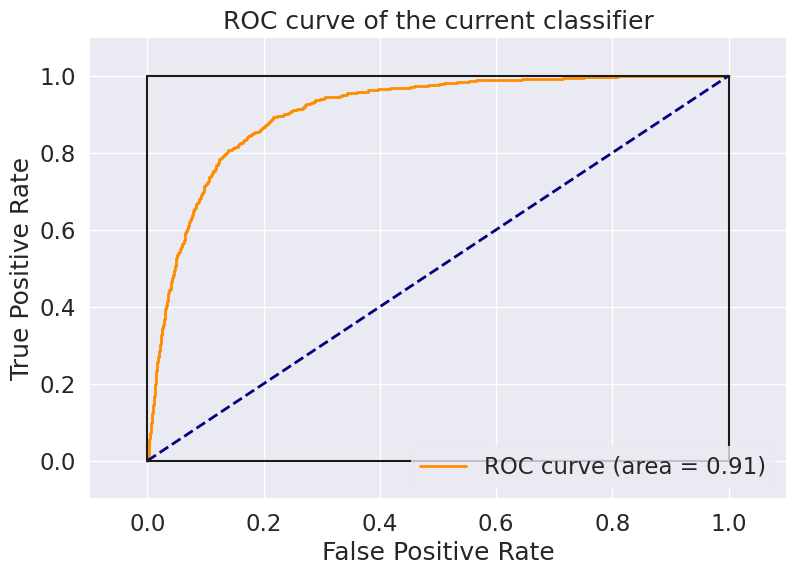

In [ ]:
# First model (Logistic Regression) definition, training and evaluation
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, solver='lbfgs', tol=1e-06, max_iter=1000)

logreg, results.at[0, 'myColsOptimal'] = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)


In [ ]:
### Recursive feature elimination with cross-validation for the first model (Logistic regression)

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(3), scoring='recall')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
Qty = rfecv.n_features_

# Get numerical feature importances
importances = list(rfecv.ranking_)
# Saving feature names for later use
feature_list = list(dataCols)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances
print('\nFeature Ranking:\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# Plot number of features VS. cross-validation scores
# plt.figure(figsize=(15,10))
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

Optimal number of features : 27

Feature Ranking:

Variable: duration             Importance: 1
Variable: accountBalance       Importance: 1
Variable: house                Importance: 1
Variable: credit               Importance: 1
Variable: numberOfContacts     Importance: 1
Variable: daySinceLastCampaign Importance: 1
Variable: numberOfContactsLastCampaign Importance: 1
Variable: aug                  Importance: 1
Variable: dec                  Importance: 1
Variable: jan                  Importance: 1
Variable: jul                  Importance: 1
Variable: jun                  Importance: 1
Variable: mar                  Importance: 1
Variable: may                  Importance: 1
Variable: nov                  Importance: 1
Variable: oct                  Importance: 1
Variable: sep                  Importance: 1
Variable: houseWife            Importance: 1
Variable: retired              Importance: 1
Variable: selfEmployed         Importance: 1
Variable: student              Importance

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Here, the trend of scores becomes relatively flat from about 27 features. So, we can try with 27 features with highest ranking.

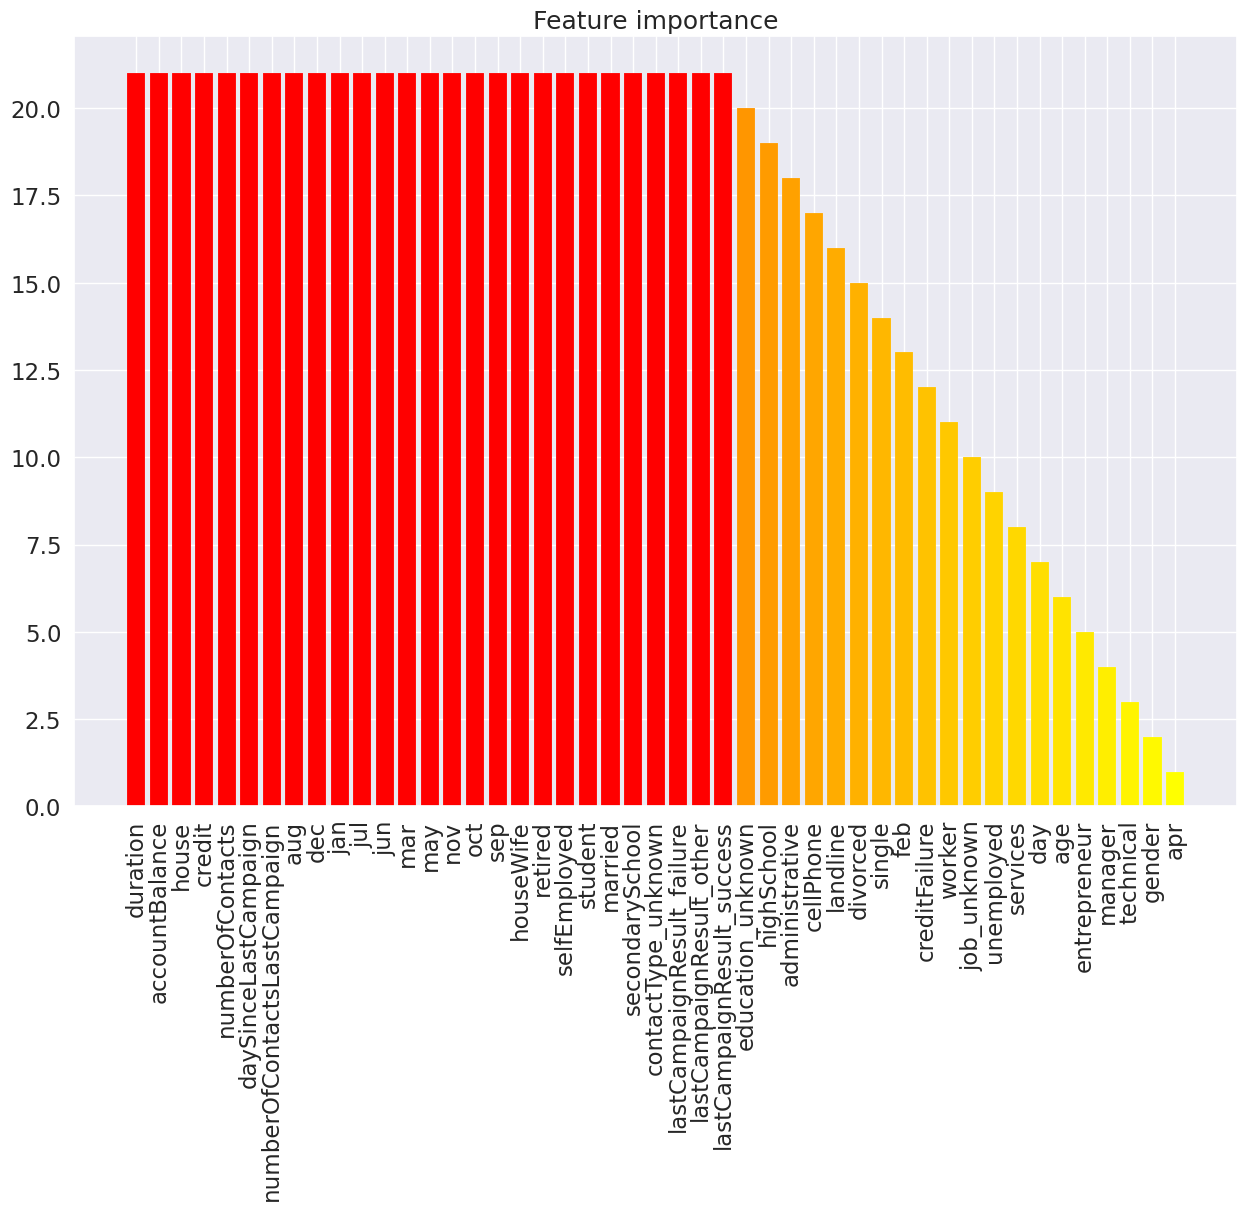

In [ ]:
# Plotting feature importances based on RFE selection approach
MAX_score = feature_importances[-1:][0][1] + 1

import importlib

plot_data = {}

for i in feature_importances:
    plot_data[i[0]] = MAX_score - i[1]
colors = ['red'] * (Qty)
cmap = get_cmap(len(plot_data), name = 'autumn')
for i in range(Qty, len(plot_data)+1):
    colors.append(cmap(i))
plt.figure(figsize=(15,10))
plt.bar(plot_data.keys(), plot_data.values(), color = colors)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

In [ ]:
# Determining indices of the features that should be dropped
removing_idx = []

idx = 0
for feature in feature_importances:
    if feature[1] > 1:
        removing_idx.append(idx)
    idx += 1


               precision    recall  f1-score   support

         yes       0.38      0.80      0.52       738
          no       0.97      0.83      0.89      5558

    accuracy                           0.83      6296
   macro avg       0.68      0.82      0.71      6296
weighted avg       0.90      0.83      0.85      6296

Dimensions of training data: (25184, 27)
Recall: 80.35%


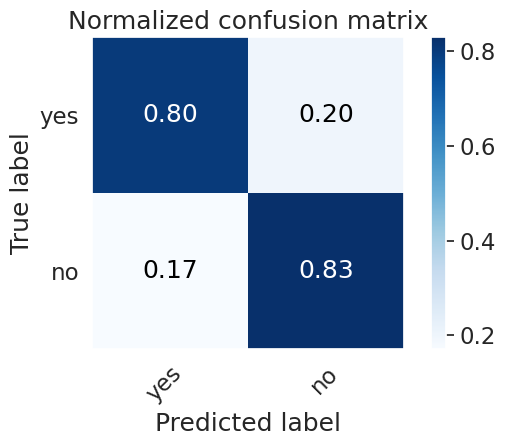

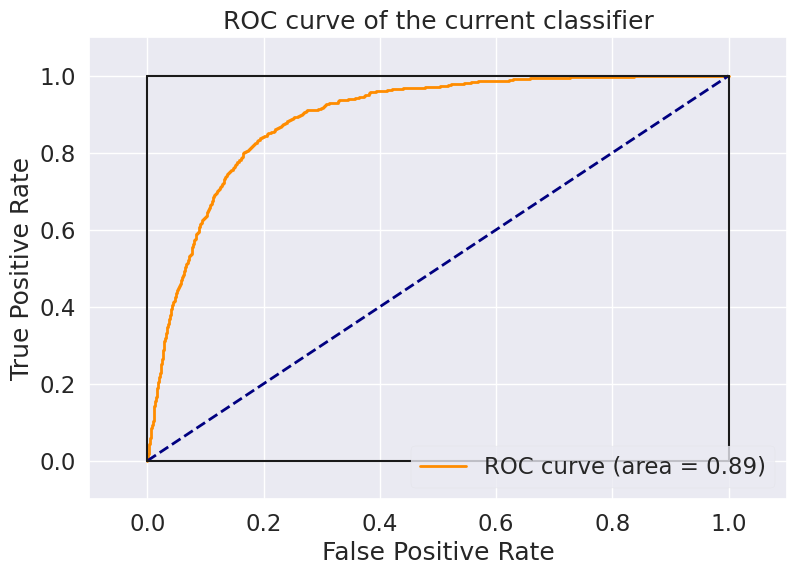

In [ ]:
# First model (Logistic Regression) definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)


logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, solver='lbfgs', tol=1e-06, max_iter=1000)

logreg, results.at[0, 'orgDataOptimalRFE'] = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)

In [ ]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.30,80.89,82.38,81.44,80.35,,,
1,Random Forest,,,,,,,,
2,Support Vector Machine,,,,,,,,
3,Extra Trees,,,,,,,,
4,Gradient Boosting,,,,,,,,
5,Xgboost,,,,,,,,


*Model # 2: Random Forest*


               precision    recall  f1-score   support

         yes       0.70      0.30      0.42       738
          no       0.91      0.98      0.95      5558

    accuracy                           0.90      6296
   macro avg       0.81      0.64      0.69      6296
weighted avg       0.89      0.90      0.89      6296

Dimensions of training data: (25184, 47)
Recall: 30.35%


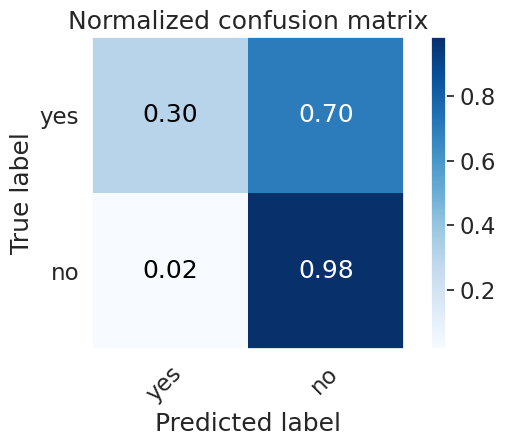

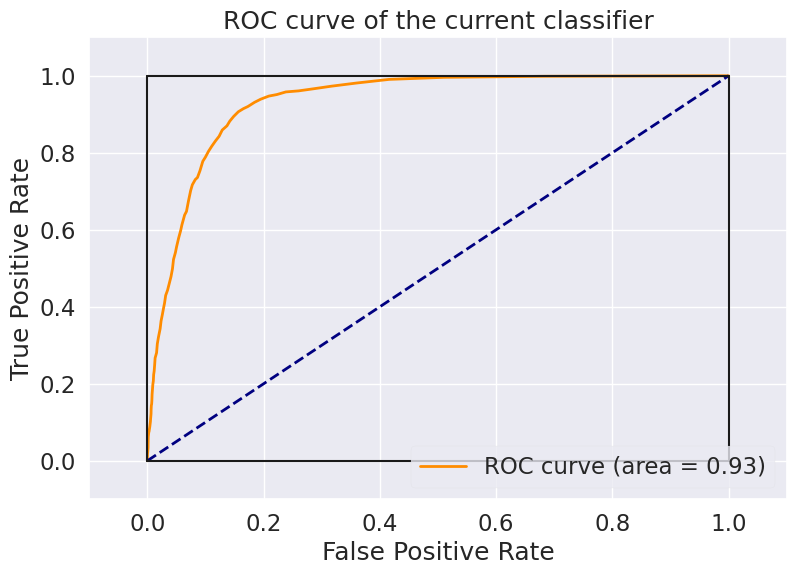

In [ ]:
# Second model (Random Forest) definition, train and evaluation:
# on the original data (orgData)
# with default hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

forest = RandomForestClassifier(random_state=0, class_weight='balanced')

forest, results.at[1, 'orgDataDefault'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.63      0.41      0.50       738
          no       0.93      0.97      0.95      5558

    accuracy                           0.90      6296
   macro avg       0.78      0.69      0.72      6296
weighted avg       0.89      0.90      0.89      6296

Dimensions of training data: (25184, 21)
Recall: 41.33%


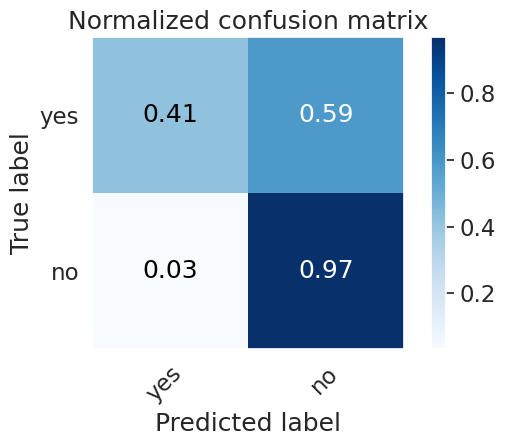

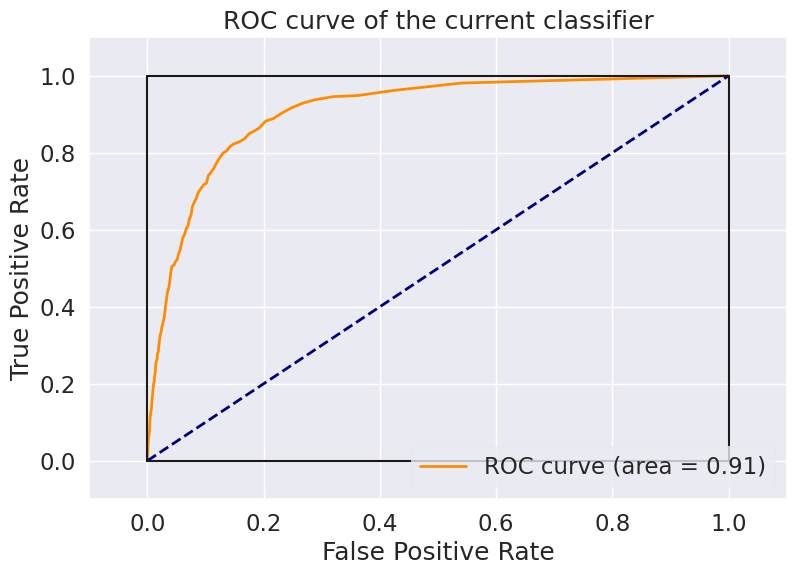

In [ ]:
# Second model (Random Forest) definition, train and evaluation:
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

forest = RandomForestClassifier(random_state=0, class_weight='balanced')

forest, results.at[1, 'myColsDefault'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)

In [ ]:
# GridSearchCV for tuning hyper parameters of the second model (Random Forest)

[X_train, X_test, y_train, y_test] = myData(Data)


stage = 5

if stage == 1:
    # In order to decide on boosting parameters, we need to set some 'initial values' of other parameters.
    # all of these values are just initial estimates and will be tuned later.

    # Here, we try to choose some initial values for parameters that do not decrease the recall score that we had
    # with the default values of the parameters
    clf = RandomForestClassifier(max_depth=10,random_state=0, class_weight='balanced')

    # Now, we check the optimum number of trees.
    # For this purpose, we can do a grid search and test out values from 20 to 100 in steps of 20.
    param_grid = {
        'n_estimators' : range(60, 150, 20) # 80
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 2:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, random_state=0, class_weight='balanced')

    param_grid = {
        'max_depth' : range(2,15,2) # 6
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 3:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, max_depth=6, random_state=0, class_weight='balanced')

    param_grid = {
        'min_samples_split' : range(2,15,2) # 4
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 4:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, max_depth=6,
                               random_state=0, class_weight='balanced', min_samples_split=4)

    param_grid = {
        'min_samples_leaf' : range(2,15,2) # 12
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 5:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

    param_grid = {
        'max_features' : [3, 4, 5, 6, 7, 8] # 5 , here dafault value (sqrt) works well, no need to add the parameter explicitly
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

Best params for recall_score
{'max_features': 5}



               precision    recall  f1-score   support

         yes       0.38      0.85      0.53       738
          no       0.98      0.82      0.89      5558

    accuracy                           0.82      6296
   macro avg       0.68      0.83      0.71      6296
weighted avg       0.91      0.82      0.85      6296

Dimensions of training data: (25184, 47)
Recall: 85.23%


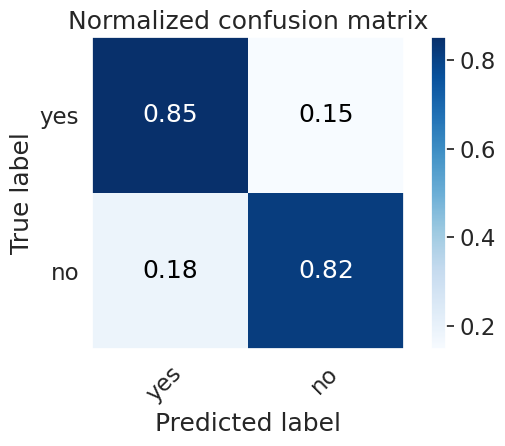

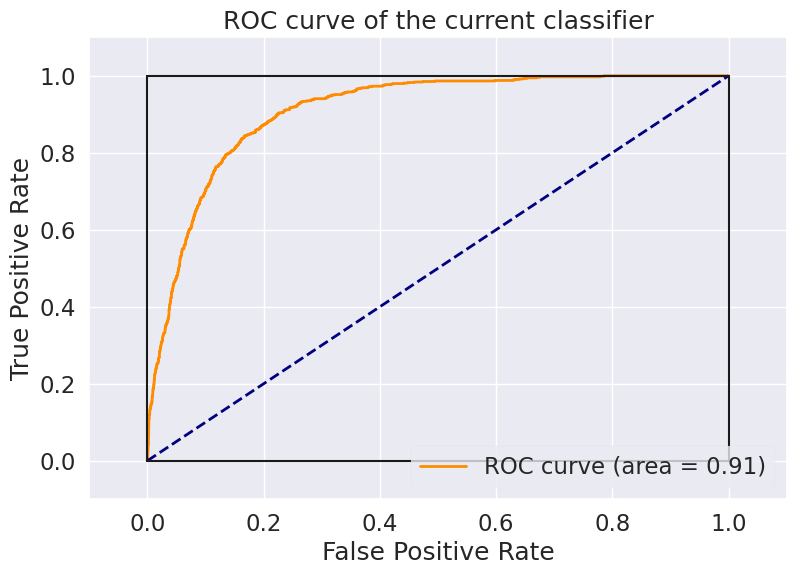

In [ ]:
# Second model (Random Forest) definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

forest, results.at[1, 'orgDataOptimal'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

         yes       0.38      0.87      0.53       738
          no       0.98      0.81      0.89      5558

    accuracy                           0.82      6296
   macro avg       0.68      0.84      0.71      6296
weighted avg       0.91      0.82      0.85      6296

Dimensions of training data: (25184, 21)
Recall: 87.26%


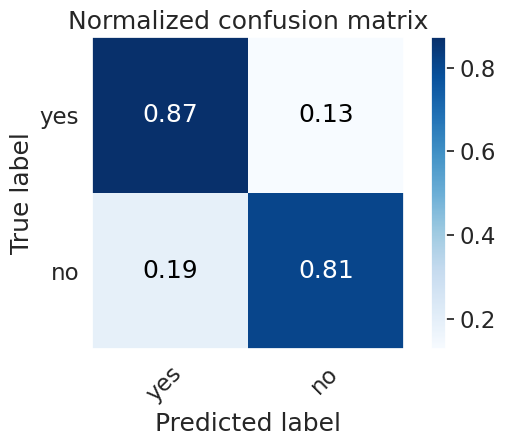

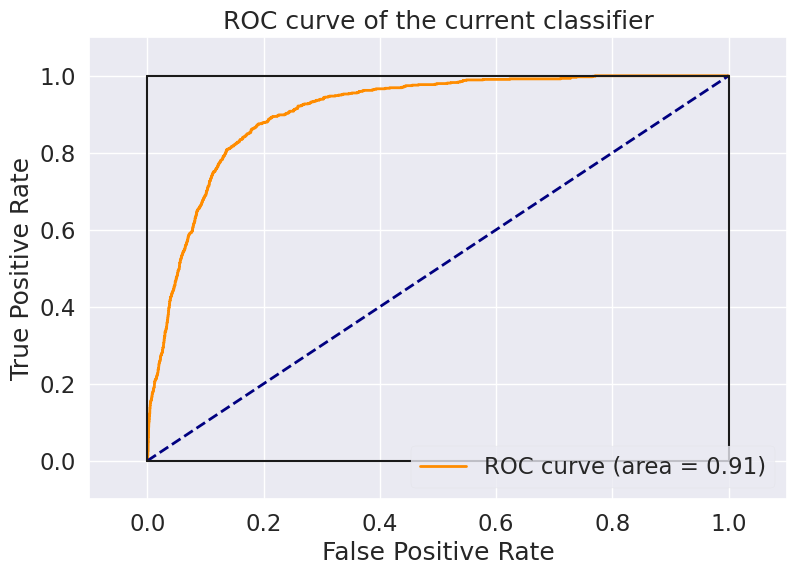

In [ ]:
# Second model (Random Forest) definition, train and evaluation:
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

forest, results.at[1, 'myColsOptimal'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)

Optimal number of features : 28

Feature Ranking:

Variable: day                  Importance: 1
Variable: duration             Importance: 1
Variable: age                  Importance: 1
Variable: accountBalance       Importance: 1
Variable: house                Importance: 1
Variable: credit               Importance: 1
Variable: numberOfContacts     Importance: 1
Variable: daySinceLastCampaign Importance: 1
Variable: numberOfContactsLastCampaign Importance: 1
Variable: apr                  Importance: 1
Variable: aug                  Importance: 1
Variable: jul                  Importance: 1
Variable: jun                  Importance: 1
Variable: mar                  Importance: 1
Variable: may                  Importance: 1
Variable: nov                  Importance: 1
Variable: oct                  Importance: 1
Variable: sep                  Importance: 1
Variable: retired              Importance: 1
Variable: student              Importance: 1
Variable: worker               Importance

AttributeError: 'RFECV' object has no attribute 'grid_scores_'

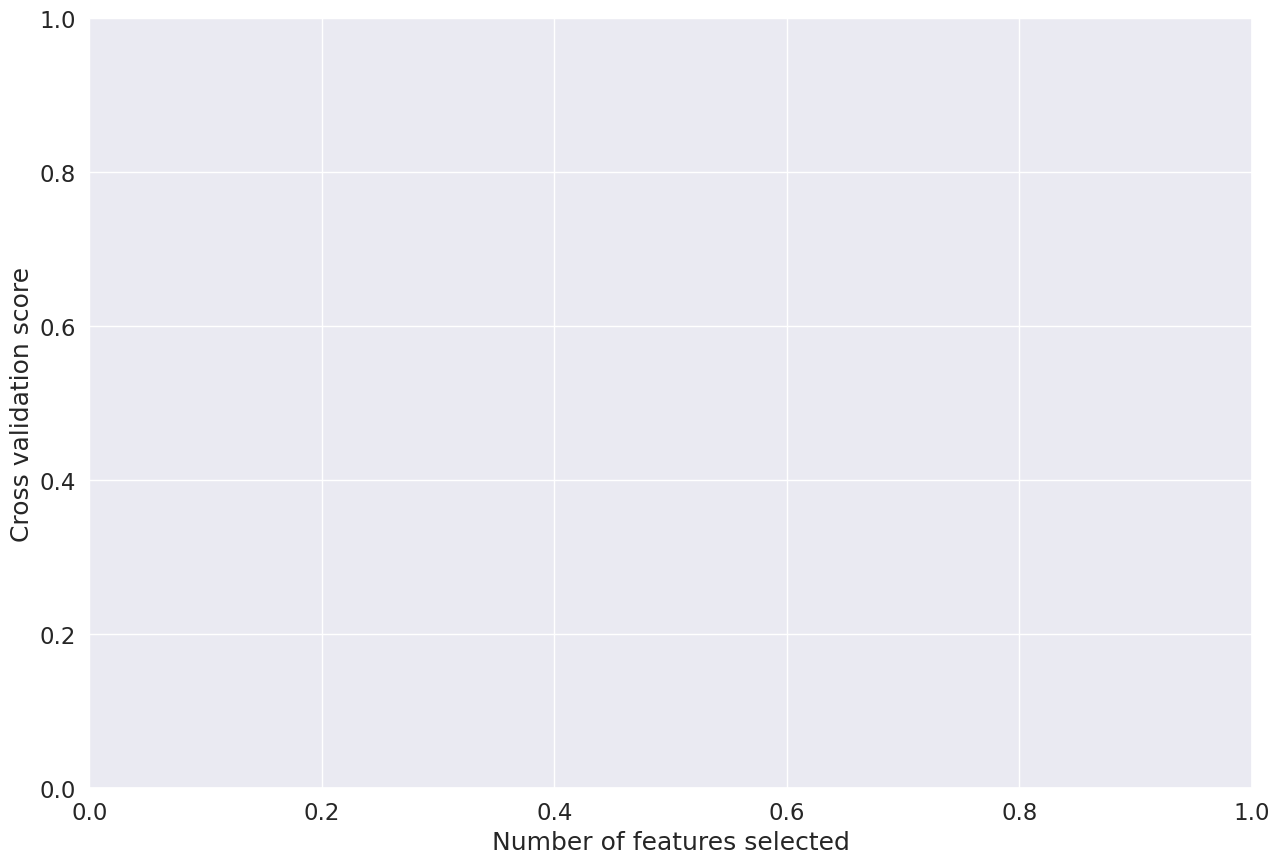

In [ ]:
### Recursive feature elimination with cross-validation for the second model (Random Forest)

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

rfecv = RFECV(estimator=forest, step=1, cv=StratifiedKFold(3), scoring='recall')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
Qty = rfecv.n_features_

# Get numerical feature importances
importances = list(rfecv.ranking_)
# Saving feature names for later use
feature_list = list(dataCols)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances
print('\nFeature Ranking:\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
# Plotting feature importances based on RFE selection approach

MAX_score = feature_importances[-1:][0][1] + 1

import importlib

plot_data = {}

for i in feature_importances:
    plot_data[i[0]] = MAX_score - i[1]
colors = ['red'] * (Qty)
cmap = get_cmap(len(plot_data), name = 'autumn')
for i in range(Qty, len(plot_data)+1):
    colors.append(cmap(i))
plt.figure(figsize=(15,10))
plt.bar(plot_data.keys(), plot_data.values(), color = colors)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

In [ ]:
 #Determining indices of the features that should be dropped

removing_idx = []

idx = 0
for feature in feature_importances:
    if feature[1] > 1:
        removing_idx.append(idx)
    idx += 1

In [ ]:
# Second model (Random Forest) definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

forest, results.at[1, 'orgDataOptimalRFE'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)

In [ ]:
results

Model # 3: ***SVM***

In [ ]:
# Third model (SVM) definition, definition, training and evaluation
# on the original data (orgData)
# with default hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

from sklearn.svm import SVC

svc = SVC(random_state=0, class_weight='balanced')

svc, results.at[2, 'orgDataDefault'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)

In [ ]:
# Third model (SVM) definition, training and evaluation
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.svm import SVC

svc = SVC(random_state=0, class_weight='balanced')

svc, results.at[2, 'myColsDefault'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)

In [ ]:
# GridSearchCV for tuning the parameters of the third model (SVC)
# on myCols

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.svm import SVC

clf = SVC(kernel = 'linear', class_weight='balanced')

param_grid = {
    'C' : [0.5, 1],
    'gamma' : [0.1, 0.2, 0.5]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

In [ ]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_C',
         'param_gamma']].round(3).head(10)


In [ ]:
# Third model (SVM) definition, definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

from sklearn.svm import SVC

svc = SVC(kernel='linear', class_weight='balanced', C=1, random_state=0, gamma=0.1)

svc, results.at[2, 'orgDataOptimal'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)

In [ ]:
# Third model (SVM) definition, training and evaluation
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.svm import SVC

svc = SVC(kernel='linear', class_weight='balanced', C=1, random_state=0, gamma=0.1)

svc, results.at[2, 'myColsOptimal'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)

In [ ]:
# Third model (SVM) definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on SVM is too expensive)


[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)


svc = SVC(kernel='linear', class_weight='balanced', C=1, random_state=0, gamma=0.1)

svc, results.at[2, 'orgDataOptimalRFE'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)


In [ ]:
results

# ***Model # 4: Extra Trees***

In [ ]:
# Fourth model (Extra Trees Classifier) definition, definition, training and evaluation
# on the original data (orgData)
# with default hyper parameters

from sklearn.ensemble import ExtraTreesClassifier as ETC

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

xTrees = ETC(random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'orgDataDefault'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)

In [ ]:
# Fourth model (Extra Trees Classifier) definition, training and evaluation
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

xTrees = ETC(random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'myColsDefault'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)

In [ ]:
# GridSearchCV for tuning the parameters of the fourth model (Extra Trees Classifier)
# on myCols

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.ensemble import ExtraTreesClassifier as ETC

clf = ETC(class_weight = 'balanced')

param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [5, 10, 15, 20],
    'min_samples_split': [5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

In [ ]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_n_estimators',
         'param_max_depth', 'param_min_samples_split', 'param_max_features']].round(3).head(10)

In [ ]:
# Fourth model (Extra Trees Classifier) definition, definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters

from sklearn.ensemble import ExtraTreesClassifier as ETC

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

xTrees = ETC(n_estimators=200, max_depth=20, max_features='log2', min_samples_split= 20,
                               random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'orgDataOptimal'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)

In [ ]:
# Fourth model (Extra Trees Classifier) definition, training and evaluation
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

xTrees = ETC(n_estimators=200, max_depth=20, max_features='log2', min_samples_split= 20,
                               random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'myColsOptimal'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)


In [ ]:
# Fourth model (Extra Trees Classifier) definition, definition, training and evaluation
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on ETC is too expensive)

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

xTrees = ETC(n_estimators=200, max_depth=20, max_features='log2', min_samples_split= 20,
                               random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'orgDataOptimalRFE'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)

results

*Model # 5: Gradient Boosting*

Gradient Boosting is a sequential process and thus every time it makes an incorrect prediction, it focuses more on that incorrectly predicted data point. So, if the first iteration gave you an accuracy of 80 %, the second iteration would focus on the remaining 20%.

Since Garient Boosting Classifier has no class_weight parameter to be able to handle class imbalance problem, we use our balanced data (smoteData) on it:

In [ ]:
# Fifth model (Gradient Boosting Classifier) definition, definition, training and evaluation
# on the balanced Data (smoteData)
# with default hyper parameters

from sklearn.ensemble import GradientBoostingClassifier as GBC

[X_train, X_test, y_train, y_test] = smoteData(Data)

gBoosting = GBC(random_state=0)

gBoosting,  results.at[4, 'smoteDataDefault'] = train_and_evaluate(gBoosting, X_train, y_train, X_test, y_test)

plotROC(gBoosting, X_train, y_train, X_test, y_test)

In [ ]:
# GridSearchCV for tuning the parameters of the fifth model (Gradient Boosting Classifier)
# on smoteData

[X_train, X_test, y_train, y_test] = smoteData(Data)

from sklearn.ensemble import GradientBoostingClassifier as GBC

stage = 4

if stage == 1:
    # In order to decide on boosting parameters, we need to set some 'initial values' of other parameters.
    # all of these values are just initial estimates and will be tuned later.
    # min_samples_split => 0.5~1% of total samples
    # min_sample_leaf = 50 => selected based on intuition
    # max_depth = 5 => Should be chosen (5-8) based on the number of samples and features
    # max_featres = 'sqrt'
    # subsample = 0.8 => commonly used start value
    # random_state = 10 => shoulb be always the same for keeping he results comparible in different executions
    # learning_rate = 0.1 => default value

    # Here, we try to choose some initial values for parameters that do not decrease the recall score that we had
    # with the default values of the parameters
    clf = GBC(min_samples_split=200, min_samples_leaf=20, max_depth=5, max_features='sqrt',
                subsample=0.8, random_state=10, learning_rate=0.1)

    # Now, we check the optimum number of trees.
    # For this purpose, we can do a grid search and test out values from 20 to 100 in steps of 10.
    param_grid = {
        'n_estimators' : range(20,201,10) # 150
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 2:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = GBC(learning_rate=0.1, n_estimators=90, max_features='sqrt', subsample=0.8, random_state=10)

    param_grid = {
        'max_depth' : range(5,16,5), # 5
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 3:
    clf = GBC(max_depth=5, learning_rate=0.1, n_estimators=90,
              max_features='sqrt', subsample=0.8, random_state=10)

    param_grid = {
        'min_samples_split' : range(200,1001,200), #300
        'min_samples_leaf' : range(30,71,10) # 50
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 4:
    clf = GBC(max_features='sqrt', min_samples_leaf= 50, min_samples_split=400, max_depth=5, learning_rate=0.1, n_estimators=90
              , random_state=10)

    param_grid = {
        'subsample' : [0.6,0.7,0.75,0.8,0.85,0.9] # 0.75
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')


In [ ]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_subsample']].round(3)

In [ ]:
# Fifth model (Gradient Boosting Classifier) definition, definition, training and evaluation
# on the balanced Data (smoteData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = smoteData(Data)

gBoosting = GBC(max_features='sqrt', min_samples_leaf= 50, min_samples_split=300, max_depth=5, learning_rate=0.01
                , n_estimators=150, subsample=0.75, random_state=10)

gBoosting,  results.at[4, 'smoteDataOptimal'] = train_and_evaluate(gBoosting, X_train, y_train, X_test, y_test)

plotROC(gBoosting, X_train, y_train, X_test, y_test)

In [ ]:
# Fifth model (Gradient Boosting Classifier) definition, training and evaluation
# on the balanced Data (smoteData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on Gradient Boosting Classifier is too expensive)

[X_train, X_test, y_train, y_test] = smoteData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

gBoosting = GBC(max_features='sqrt', min_samples_leaf= 50, min_samples_split=300, max_depth=5, learning_rate=0.01
                , n_estimators=150, subsample=0.75, random_state=10)

gBoosting,  results.at[4, 'smoteDataOptimalRFE'] = train_and_evaluate(gBoosting, X_train, y_train, X_test, y_test)

plotROC(gBoosting, X_train, y_train, X_test, y_test)


In [ ]:
results

# ***Model # 6: XGBoost***

Since XGBoost Classifier has no class_weight parameter to be able to handle class imbalance problem, we use our balanced data (smoteData) on it:

In [ ]:
# Sixth model (Xgboost) definition, definition, training and evaluation
# on the balanced Data (smoteData)
# with default hyper parameters

from xgboost import XGBClassifier

[X_train, X_test, y_train, y_test] = smoteData(Data)

xgb = XGBClassifier(random_state=0)

xgb,  results.at[5, 'smoteDataDefault'] = train_and_evaluate(xgb, X_train, y_train, X_test, y_test)

plotROC(xgb, X_train, y_train, X_test, y_test)

In [ ]:
# GridSearchCV for tuning the parameters of the sixth model (XGBoost Classifier)
# on the balanced Data (smoteData)

[X_train, X_test, y_train, y_test] = smoteData(Data)

from xgboost import XGBClassifier

stage = 6

if stage == 1:
    # In order to decide on boosting parameters, we need to set some 'initial values' of other parameters.
    # all of these values are just initial estimates and will be tuned later.

    # Here, we try to choose some initial values for parameters that do not decrease the recall score that we had
    # with the default values of the parameters
    clf = XGBClassifier(objective= 'binary:logistic', random_state=0)

    # Now, we check the optimum number of trees.
    # For this purpose, we can do a grid search and test out values from 20 to 100 in steps of 20.
    param_grid = {
        'n_estimators' : range(10, 101, 20) # 90
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 2:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = XGBClassifier(objective= 'binary:logistic', n_estimators=90)

    param_grid = {
        'max_depth' : range(2,10,1) # 2
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 3:
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2)

    param_grid = {
        'min_child_weight':range(1,10,1) # No difference (default value works well, do not add this parameter)
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 4:
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2)

    param_grid = {
        'gamma':[i/10.0 for i in range(0,5)] # No difference (default value works well, do not add this parameter)
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 5:
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2)

    param_grid = {
        #'subsample':[i/10.0 for i in range(6,10)], # No difference (default value works well, do not add this parameter)
        'colsample_bytree':[i/10.0 for i in range(6,10)] # 0.6
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

if stage == 6:
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2, colsample_bytree=0.6)

    param_grid = {
        'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05] # 0.05
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

In [ ]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_reg_alpha']].round(3)

In [ ]:
# Sixth model (Xgboost) definition, training and evaluation
# on the balanced Data (smoteData)
# with optimal hyper parameters
# increasing reg_alpha from 0.05 to 2 without recall loss to force classifier to do more feature selection

from xgboost import XGBClassifier

[X_train, X_test, y_train, y_test] = smoteData(Data)

xgb = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2, colsample_bytree=0.6, reg_alpha=2
                   , learning_rate=0.011)

xgb,  results.at[5, 'smoteDataOptimal'] = train_and_evaluate(xgb, X_train, y_train, X_test, y_test)

plotROC(xgb, X_train, y_train, X_test, y_test)


In [ ]:
# Sixth model (Xgboost) definition, training and evaluation
# on the balanced Data (smoteData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on Xgboost classifier is too expensive)

[X_train, X_test, y_train, y_test] = smoteData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

xgb = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2, colsample_bytree=0.6, reg_alpha=2
                   , learning_rate=0.011)

gBoosting,  results.at[5, 'smoteDataOptimalRFE'] = train_and_evaluate(xgb, X_train, y_train, X_test, y_test)

plotROC(xgb, X_train, y_train, X_test, y_test)

In [ ]:
results

# *Running the best Model on the test data:*

In [ ]:
# reading the test data from csv file:
tData = pd.read_csv('/content/test.csv.zip')
tData.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432176974,NaN,5,may,283,69546777,35,male,manager,married,uniGraduated,no,76,no,no,cellPhone,1,362.00,9,failure
1,432157692,NaN,18,jul,111,69546887,31,male,manager,married,uniGraduated,no,557,yes,no,cellPhone,1,NaN,0,unknown
2,432170850,NaN,29,jan,475,69550874,26,male,technical,single,uniGraduated,no,1274,no,no,landline,2,NaN,0,unknown
3,432151613,NaN,5,jun,209,69560082,26,male,worker,married,highSchool,no,986,yes,no,unknown,3,NaN,0,unknown
4,432167744,NaN,18,nov,459,69561716,32,male,worker,single,highSchool,no,3845,yes,no,cellPhone,3,NaN,0,unknown


In [ ]:
# Dropping the 'Zilevariable' that has no data:
tData.drop(['target'], axis=1, inplace=True);

In [ ]:
tData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13731 entries, 0 to 13730
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13731 non-null  int64  
 1   day                           13731 non-null  int64  
 2   month                         13731 non-null  object 
 3   duration                      13731 non-null  int64  
 4   contactId                     13731 non-null  int64  
 5   age                           13731 non-null  int64  
 6   gender                        13731 non-null  object 
 7   job                           13731 non-null  object 
 8   maritalStatus                 13731 non-null  object 
 9   education                     13731 non-null  object 
 10  creditFailure                 13731 non-null  object 
 11  accountBalance                13731 non-null  int64  
 12  house                         13731 non-null  object 
 13  c

In [ ]:
# Next, we take a look to see if there is any missing data in our Training data:
missing_data = pd.DataFrame({'total_missing': tData.isnull().sum(), 'perc_missing': (tData.isnull().sum()/len(tData))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(tData.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

In [ ]:
tData['daySinceLastCampaign'].fillna(-1, inplace=True)

In [ ]:
missing_data = pd.DataFrame({'total_missing': tData.isnull().sum(), 'perc_missing': (tData.isnull().sum()/len(tData))*100}).round(2)
missing_data

In [ ]:
### Monat one-hot Encoding ###

# Get one hot encoding of columns 'Monat'
month_one_hot = pd.get_dummies(tData.month)
# Drop column 'Monat' as it is now encoded
tData.drop('month',axis = 1, inplace=True)
# Join the encoded Monat fields
tData = tData.join(month_one_hot)

In [ ]:
###  one-hot encoding of the fields:
### 'job', 'maritalStatus', 'education', 'contactType' & 'lastCampaignResult'

# make a difference between 'job_unknown', 'education_unknown' and 'contactType_unknown'
tData.loc[tData['job'] == 'unknown', 'job'] = 'job_unknown'
tData.loc[tData['education'] == 'unknown', 'education'] = 'education_unknown'
tData.loc[tData['contactType'] == 'unknown', 'contactType'] = 'contactType_unknown'

# for more clarification of values in 'lastCampaignResult' field we change them as follows
tData.loc[tData['lastCampaignResult'] == 'unknown', 'lastCampaignResult'] = 'lastCampaignResult_unknown'
tData.loc[tData['lastCampaignResult'] == 'failure', 'lastCampaignResult'] = 'lastCampaignResult_failure'
tData.loc[tData['lastCampaignResult'] == 'other'  , 'lastCampaignResult'] = 'lastCampaignResult_other'
tData.loc[tData['lastCampaignResult'] == 'success', 'lastCampaignResult'] = 'lastCampaignResult_success'


columns = ['job', 'maritalStatus', 'education', 'contactType', 'lastCampaignResult']

for col in columns:
    # Get one hot encoding of the column
    col_one_hot = pd.get_dummies(tData[col])
    # Drop column as it is now encoded
    tData.drop(col,axis = 1, inplace=True)
    # Join the encoded Monat fields
    tData = tData.join(col_one_hot)

In [ ]:
# Variable Encoding of the fields 'gender', 'creditFailure', 'credit', 'house' as we did for 'target' before

Geschlecht_conversion = {"gender": {"female": 0, "male": 1}}
tData.replace(Geschlecht_conversion, inplace=True)

columns = ['creditFailure', 'credit', 'house']

for col in columns:
    conversion = {col: {"no": 0, "yes": 1}}
    tData.replace(conversion, inplace=True)

In [ ]:
# dropping ID-like columns
IDs = tData['id']
tData.drop(['id'], axis = 1, inplace = True)
tData.drop(['contactId'], axis = 1, inplace = True)

In [ ]:
# removing multi colinear features
tData.drop(['uniGraduated'], axis = 1, inplace = True)
tData.drop(['lastCampaignResult_unknown'], axis = 1, inplace = True)

In [ ]:
# applying the same normalizazion process on the test data

tCols = tData.columns

tData = scaler.transform(tData)

tData = pd.DataFrame(tData, columns=tCols);

In [ ]:
# decreasing binary features type accuracy for a more efficient memory usage
for col in tData.columns:
    if len(tData[col].unique()) == 2:
        tData[col]= tData[col].astype('uint8')

In [ ]:
# preparing the best experienced model
model = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0,
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

# data preparation
[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

# training the model
model.fit(X_train,y_train)

# recheck the model performance on the training data
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=np.array(['yes', 'no']), normalize=True)
plt.grid(None)
print('\n', classification_report(y_test, y_pred, target_names=np.array(['yes', 'no']), labels = [1, 0]))

print("Dimensions of training data: {}" .format(X_train.shape))

recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

plotROC(model, X_train, y_train, X_test, y_test)

checkThresh(model, X_test, y_test, typ = 1, prt=0)

In [ ]:
# Taking the probabilities of the test data
finalProbs = model.predict_proba(tData)

# taking the probabilities of the second label (positive answer of the customers to the campaign)
res = finalProbs[:,1]

# Stammnummer of the test samples
IDs_ = IDs.values

# creating a dataframe, saving the information inside it and save it into a csv file
tOutput = pd.DataFrame(columns=['ID', 'Expected'])
tOutput['ID'] = IDs_
tOutput['Expected'] = res
tOutput.to_csv('tOutput.csv', index=False)